# **Machine Learning Case Study: League of Legends**

We have selected a League of Legends dataset to analyze the data and explore the possibility of applying machine learning models to predict match outcomes.

In each League of Legends match, two teams of five players (referred to as the blue team and the red team) face off on a battlefield. The objective is to destroy the enemy Nexus, located in the opposing team’s base. To achieve this goal, players must navigate three main lanes (top, mid, bot), as well as the jungle that connects these routes. Each player assumes a specific role, and the team's success depends on strategic decisions and individual player skill.

The data we will use includes more than 25,000 ranked matches in SOLO QUEUE mode within the Platinum ELO range. Each match is unique and identified by a gameId, allowing access to additional data using the Riot Games API. The data includes features collected at different points in the game, from the first 10 minutes until the end, providing a total of over 240,000 time-stamped records.

The aim of this analysis is to explore the 59 available features for the blue team, including metrics such as kills, deaths, gold, experience, level, among others. We also consider boolean categorical values indicating certain game conditions. The target variable hasWon enables us to address a classification problem to predict match outcomes, while the attribute gameDuration can be used to predict game duration.

This analysis will help to better understand the factors influencing match results and provide an opportunity for feature engineering to gain deeper insights. The richness of the data opens the door to various applications, such as predicting game outcomes or optimizing strategies within League of Legends.

| Data                          | Description                                                                 |
|-------------------------------|-----------------------------------------------------------------------------|
| gameId                        | Unique identifier for the match.                                            |
| gameDuration                  | Total duration of the match in seconds.                                     |
| hasWon                        | Indicates if the team won the match (1) or not (0).                         |
| frame                         | Specific moment of the match, measured in time intervals (e.g., 10 minutes, 12 minutes). |
| goldDiff                      | Gold difference between the teams at a given moment.                        |
| expDiff                       | Experience difference between the teams.                                    |
| champLevelDiff                | Champion level difference between teams.                                    |
| isFirstTower                  | Indicates if the first tower was destroyed (1: yes, 0: no).                 |
| isFirstBlood                  | Indicates if first blood was taken (1: yes, 0: no).                         |
| killedFireDrake               | Number of fire dragons killed by the team.                                  |
| killedWaterDrake              | Number of water dragons killed by the team.                                 |
| killedAirDrake                | Number of air dragons killed by the team.                                   |
| killedEarthDrake              | Number of earth dragons killed by the team.                                 |
| killedElderDrake              | Number of elder dragons killed by the team.                                 |
| lostFireDrake                 | Number of fire dragons lost (killed by the enemy).                          |
| lostWaterDrake                | Number of water dragons lost.                                               |
| lostAirDrake                  | Number of air dragons lost.                                                 |
| lostEarthDrake                | Number of earth dragons lost.                                               |
| lostElderDrake                | Number of elder dragons lost.                                               |
| killedBaronNashor             | Number of times Baron Nashor was killed.                                    |
| lostBaronNashor               | Number of times the enemy killed Baron Nashor.                              |
| killedRiftHerald              | Number of times the Rift Herald was killed.                                 |
| lostRiftHerald                | Number of times the enemy killed the Rift Herald.                           |
| destroyedTopInhibitor         | Number of top inhibitors destroyed.                                         |
| destroyedMidInhibitor         | Number of mid inhibitors destroyed.                                         |
| destroyedBotInhibitor         | Number of bot inhibitors destroyed.                                         |
| lostTopInhibitor              | Number of top inhibitors lost.                                              |
| lostMidInhibitor              | Number of mid inhibitors lost.                                              |
| lostBotInhibitor              | Number of bot inhibitors lost.                                              |
| destroyedTopNexusTurret       | Number of top nexus turrets destroyed.                                      |
| destroyedMidNexusTurret       | Number of mid nexus turrets destroyed.                                      |
| destroyedBotNexusTurret       | Number of bot nexus turrets destroyed.                                      |
| lostTopNexusTurret            | Number of top nexus turrets lost.                                           |
| lostMidNexusTurret            | Number of mid nexus turrets lost.                                           |
| lostBotNexusTurret            | Number of bot nexus turrets lost.                                           |
| destroyedTopBaseTurret        | Number of top base turrets destroyed.                                       |
| destroyedMidBaseTurret        | Number of mid base turrets destroyed.                                       |
| destroyedBotBaseTurret        | Number of bot base turrets destroyed.                                       |
| lostTopBaseTurret             | Number of top base turrets lost.                                            |
| lostMidBaseTurret             | Number of mid base turrets lost.                                            |
| lostBotBaseTurret             | Number of bot base turrets lost.                                            |
| destroyedTopInnerTurret       | Number of top inner turrets destroyed.                                      |
| destroyedMidInnerTurret       | Number of mid inner turrets destroyed.                                      |
| destroyedBotInnerTurret       | Number of bot inner turrets destroyed.                                      |
| lostTopInnerTurret            | Number of top inner turrets lost.                                           |
| lostMidInnerTurret            | Number of mid inner turrets lost.                                           |
| lostBotInnerTurret            | Number of bot inner turrets lost.                                           |
| destroyedTopOuterTurret       | Number of top outer turrets destroyed.                                      |
| destroyedMidOuterTurret       | Number of mid outer turrets destroyed.                                      |
| destroyedBotOuterTurret       | Number of bot outer turrets destroyed.                                      |
| lostTopOuterTurret            | Number of top outer turrets lost.                                           |
| lostMidOuterTurret            | Number of mid outer turrets lost.                                           |
| lostBotOuterTurret            | Number of bot outer turrets lost.                                           |
| kills                         | Number of kills made by the team or player.                                 |
| deaths                        | Number of times the team or player died.                                    |
| assists                       | Number of assists made by the team or player.                               |
| wardsPlaced                   | Number of wards placed.                                                     |
| wardsDestroyed                | Number of wards destroyed.                                                  |
| wardsLost                     | Number of wards lost.                                                       | 

## **Fase 1: Business Understanding**

In [60]:
import pandas as pd
import arff
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats  
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc, f1_score,classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputRegressor

# Function to load the dataset

def load_arff_dataset(filepath: str) -> pd.DataFrame:
    """
    Load an ARFF dataset and convert it into a Pandas DataFrame.

    Parameters:
    ----------
    filepath : str
        The path to the ARFF file to be loaded.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing the data from the ARFF file, with columns 
        named according to the attribute names defined in the ARFF file.

    Raises:
    ------
    FileNotFoundError:
        If the specified file path does not exist.
    ValueError:
        If the ARFF file does not contain valid data.
    """
    with open(filepath, 'r') as f:
        arff_data = arff.load(f)
    
    df = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])
    
    return df

In [111]:
arff_file_path = '../data/01_raw/dataset'

df = load_arff_dataset(arff_file_path)

In [4]:
# First 10 rows
df.head(10)

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
1,4546233126,1443000,1,12,-1306,-925,-0.6,0,1,0,...,0,0,0,0,6,11,6,28,4,6
2,4546233126,1443000,1,14,2115,2578,0.4,1,1,0,...,0,0,0,0,10,11,12,35,4,6
3,4546233126,1443000,1,16,1195,2134,0.4,1,1,0,...,0,0,1,0,10,12,12,45,6,10
4,4546233126,1443000,1,18,2931,4382,0.6,1,1,1,...,0,0,1,0,13,13,16,49,7,12
5,4546233126,1443000,1,20,6127,7606,0.8,1,1,1,...,1,0,1,0,20,14,28,63,9,13
6,4546233126,1443000,1,22,7428,7842,1.4,1,1,1,...,1,0,1,0,23,15,33,75,10,13
7,4546233126,1443000,1,24,9426,11980,1.8,1,1,2,...,1,0,1,0,26,15,36,85,11,14
8,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,0,0,6,6,7,15,4,1
9,4438212663,1241000,1,12,1263,1566,0.4,0,1,0,...,0,0,0,0,7,7,7,20,5,4


In [126]:
# last 10 rows
df.tail(10)

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
242562,4402156483,1774000,0,20,1440,1464,0.4,1,1,0,...,0,0,1,0,23,17,37,48,11,11
242563,4402156483,1774000,0,22,1291,634,0.2,1,1,0,...,0,0,1,0,25,20,41,54,11,12
242564,4402156483,1774000,0,24,-1321,-2549,-0.4,1,1,0,...,0,0,1,1,29,28,45,57,12,12
242565,4402156483,1774000,0,26,-4062,-5239,-0.8,1,1,1,...,0,0,1,1,30,32,47,67,14,15
242566,4402156483,1774000,0,28,-5640,-9016,-1.0,1,1,1,...,0,0,1,1,33,36,50,74,15,16
242567,4402156483,1774000,0,30,-8523,-13498,-1.6,1,1,1,...,0,0,1,1,33,41,50,80,18,17
242568,4379826739,1013000,0,10,-271,-1243,-0.2,0,1,0,...,0,0,0,0,6,5,6,18,1,2
242569,4379826739,1013000,0,12,-2013,-3493,-0.8,0,1,0,...,0,0,0,0,7,8,6,23,1,5
242570,4379826739,1013000,0,14,-2388,-4543,-0.8,0,1,0,...,0,0,0,0,10,13,9,27,5,6
242571,4379826739,1013000,0,16,-5601,-7595,-1.2,0,1,0,...,0,0,0,0,11,17,10,31,6,10


In [127]:
# Columns and datatype 
columnas = df.columns
for columna in columnas:
    print(f'{columna} es de tipo {df[columna].dtype}')

gameId es de tipo int64
gameDuration es de tipo int64
hasWon es de tipo int64
frame es de tipo int64
goldDiff es de tipo int64
expDiff es de tipo int64
champLevelDiff es de tipo float64
isFirstTower es de tipo int64
isFirstBlood es de tipo int64
killedFireDrake es de tipo int64
killedWaterDrake es de tipo int64
killedAirDrake es de tipo int64
killedEarthDrake es de tipo int64
killedElderDrake es de tipo int64
lostFireDrake es de tipo int64
lostWaterDrake es de tipo int64
lostAirDrake es de tipo int64
lostEarthDrake es de tipo int64
lostElderDrake es de tipo int64
killedBaronNashor es de tipo int64
lostBaronNashor es de tipo int64
killedRiftHerald es de tipo int64
lostRiftHerald es de tipo int64
destroyedTopInhibitor es de tipo int64
destroyedMidInhibitor es de tipo int64
destroyedBotInhibitor es de tipo int64
lostTopInhibitor es de tipo int64
lostMidInhibitor es de tipo int64
lostBotInhibitor es de tipo int64
destroyedTopNexusTurret es de tipo int64
destroyedMidNexusTurret es de tipo i

In [128]:
num_rows = df.shape[0]
print(f'The dataset has {num_rows} rows.')

The dataset has 242572 rows.


# Hypotheses

Based on the available data, we could work under the following hypotheses:

* How do neutral objectives (Dragons, Baron, and Rift Herald) impact a team’s victory?
* Time series prediction
* Does the number of kills and assists in the first 10 minutes (frame) significantly impact a team’s chances of victory?

## **Fase 2: Data Understanding**

### Null Data Verification

In [129]:
df.isnull().sum()

gameId                     0
gameDuration               0
hasWon                     0
frame                      0
goldDiff                   0
expDiff                    0
champLevelDiff             0
isFirstTower               0
isFirstBlood               0
killedFireDrake            0
killedWaterDrake           0
killedAirDrake             0
killedEarthDrake           0
killedElderDrake           0
lostFireDrake              0
lostWaterDrake             0
lostAirDrake               0
lostEarthDrake             0
lostElderDrake             0
killedBaronNashor          0
lostBaronNashor            0
killedRiftHerald           0
lostRiftHerald             0
destroyedTopInhibitor      0
destroyedMidInhibitor      0
destroyedBotInhibitor      0
lostTopInhibitor           0
lostMidInhibitor           0
lostBotInhibitor           0
destroyedTopNexusTurret    0
destroyedMidNexusTurret    0
destroyedBotNexusTurret    0
lostTopNexusTurret         0
lostMidNexusTurret         0
lostBotNexusTu

We can observe that there are no null values within the dataset.

In [130]:
df.nunique()

gameId                     24912
gameDuration                2074
hasWon                         2
frame                         24
goldDiff                   28629
expDiff                    28949
champLevelDiff               123
isFirstTower                   2
isFirstBlood                   2
killedFireDrake                5
killedWaterDrake               5
killedAirDrake                 5
killedEarthDrake               5
killedElderDrake               4
lostFireDrake                  5
lostWaterDrake                 5
lostAirDrake                   5
lostEarthDrake                 5
lostElderDrake                 4
killedBaronNashor              5
lostBaronNashor                5
killedRiftHerald               3
lostRiftHerald                 3
destroyedTopInhibitor          4
destroyedMidInhibitor          4
destroyedBotInhibitor          5
lostTopInhibitor               4
lostMidInhibitor               4
lostBotInhibitor               5
destroyedTopNexusTurret        2
destroyedM

In [131]:
# List to store the names of columns with negative numbers
columns_with_negatives = []

# Iterate over each column and check if it contains negative numbers
for column in df.columns:
    if (df[column] < 0).any():
        columns_with_negatives.append(column)

if columns_with_negatives:
    print("Columns with negative numbers:", columns_with_negatives)
else:
    print("There are no columns with negative numbers.")


Columns with negative numbers: ['goldDiff', 'expDiff', 'champLevelDiff']


The columns that contain negative numbers are correct, as it is possible for there to be negative differences in both gold and experience, as well as in champion levels during the game.

### Measures of Position

In [132]:
df.describe()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
count,2.425720e+05,2.425720e+05,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,...,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000
mean,4.501480e+09,1.785494e+06,0.498128,19.811264,-11.413811,-215.019351,-0.026517,0.617709,0.998627,0.295908,...,0.369997,0.376795,0.368822,0.355243,16.391381,16.342220,21.166029,56.833530,10.487031,10.263077
std,5.331693e+07,3.761901e+05,0.499998,7.197339,5438.051920,5261.880802,0.772366,0.485948,0.037026,0.509759,...,0.482805,0.484584,0.482487,0.478588,9.660237,9.697602,16.055645,58.734777,8.713549,8.736323
min,4.357970e+09,5.490000e+05,0.000000,10.000000,-21578.000000,-32484.000000,-4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,4.463051e+09,1.532000e+06,0.000000,14.000000,-3420.250000,-3148.000000,-0.600000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,25.000000,4.000000,4.000000
50%,4.529395e+09,1.774000e+06,0.000000,18.000000,24.000000,-123.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,15.000000,15.000000,17.000000,40.000000,8.000000,8.000000
75%,4.543718e+09,2.025000e+06,1.000000,24.000000,3409.000000,2772.000000,0.400000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,22.000000,22.000000,30.000000,63.000000,15.000000,14.000000
max,4.547671e+09,3.428000e+06,1.000000,56.000000,23432.000000,43304.000000,3.800000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,69.000000,72.000000,137.000000,1014.000000,115.000000,107.000000


In [133]:
for column in df.columns:
    mean = df[column].mean()
    mode = df[column].mode()[0] if not df[column].mode().empty else 'No mode'
    median = df[column].median()
    std_dev = df[column].std()
    print(f"Column: {column}")
    print(f" - Mean: {mean}")
    print(f" - Mode: {mode}")
    print(f" - Median: {median}")
    print(f" - Standard Deviation: {std_dev}\n")


Column: gameId
 - Mean: 4501479546.200077
 - Mode: 4361896408
 - Median: 4529395251.0
 - Standard Deviation: 53316927.63205334

Column: gameDuration
 - Mean: 1785493.8945962435
 - Mode: 1775000
 - Median: 1774000.0
 - Standard Deviation: 376190.06291678606

Column: hasWon
 - Mean: 0.4981283907458404
 - Mode: 0
 - Median: 0.0
 - Standard Deviation: 0.4999975276843313

Column: frame
 - Mean: 19.811264284418648
 - Mode: 10
 - Median: 18.0
 - Standard Deviation: 7.197338964616284

Column: goldDiff
 - Mean: -11.413811157099747
 - Mode: 647
 - Median: 24.0
 - Standard Deviation: 5438.051920127789

Column: expDiff
 - Mean: -215.01935095559256
 - Mode: -589
 - Median: -123.0
 - Standard Deviation: 5261.880802086872

Column: champLevelDiff
 - Mean: -0.0265166630938443
 - Mode: 0.0
 - Median: 0.0
 - Standard Deviation: 0.7723658247149056

Column: isFirstTower
 - Mean: 0.6177093811322
 - Mode: 1
 - Median: 1.0
 - Standard Deviation: 0.4859480168703304

Column: isFirstBlood
 - Mean: 0.998627211714

### Charts

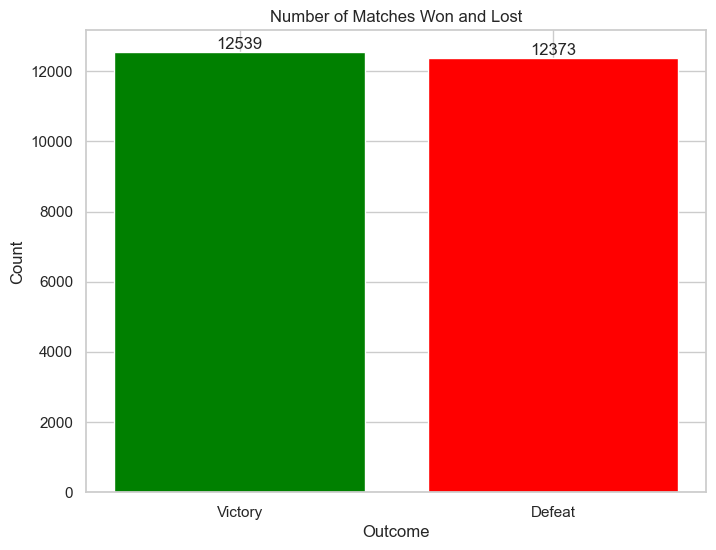

In [134]:
# Group by 'gameId' and sum the victories
results_per_game = df.groupby('gameId')['hasWon'].sum().reset_index()

# Determine if the match was won or lost
results_per_game['Outcome'] = results_per_game['hasWon'].apply(lambda x: 'Victory' if x > 0 else 'Defeat')

# Count the number of won and lost matches
outcome_count = results_per_game['Outcome'].value_counts().reset_index()
outcome_count.columns = ['Outcome', 'Count']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(outcome_count['Outcome'], outcome_count['Count'], color=['green', 'red'])

# Add numbers on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, int(height), ha='center', va='bottom')

plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Number of Matches Won and Lost')
plt.show()


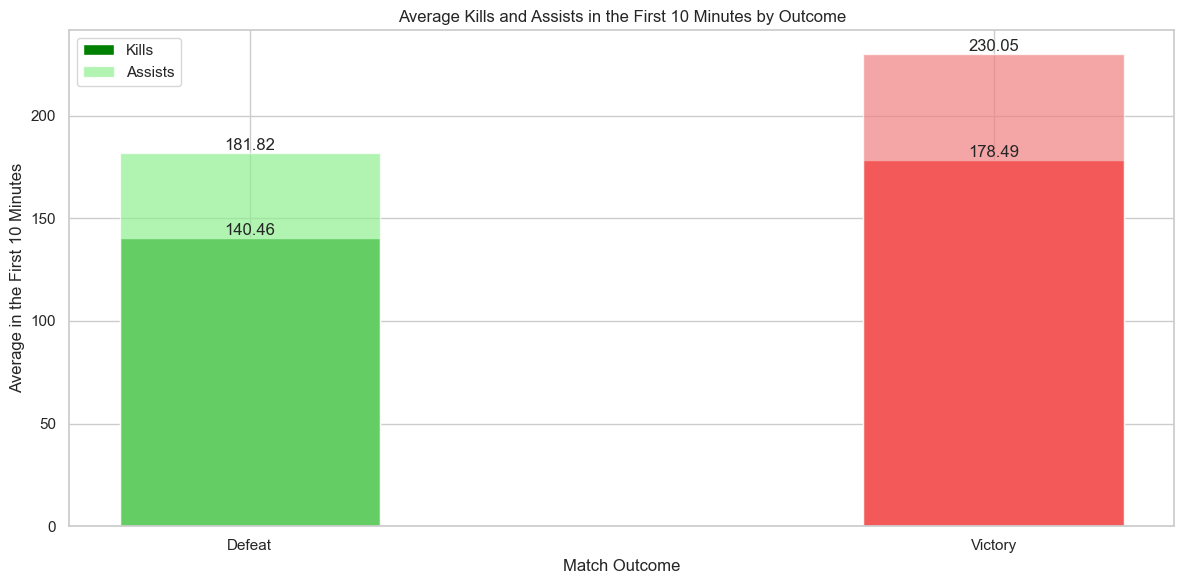

Total games analyzed: 24912
Victories: 12539 (50.33%)
Defeats: 12373 (49.67%)

Statistics for the first 10 minutes:
              kills     assists
Outcome                        
Defeat   140.463267  181.817506
Victory  178.494138  230.054869

Correlation between kills and victory: 0.4233
Correlation between assists and victory: 0.3971


In [135]:
# Filter the data for the first 10 minutes (600 seconds)
df_early = df[df['frame'] <= 600]

# Group by 'gameId' and sum kills, assists, and hasWon
early_game_stats = df_early.groupby('gameId').agg({
    'kills': 'sum',
    'assists': 'sum',
    'hasWon': 'sum'
}).reset_index()

# Determine if the match was won or lost
early_game_stats['Outcome'] = early_game_stats['hasWon'].apply(lambda x: 'Victory' if x > 0 else 'Defeat')

# Calculate the mean of kills and assists for won and lost matches
mean_stats = early_game_stats.groupby('Outcome')[['kills', 'assists']].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))

# Bars for kills
bars_kills = plt.bar(mean_stats['Outcome'], mean_stats['kills'], width=0.35, label='Kills', color=['green', 'red'])
# Bars for assists
bars_assists = plt.bar(mean_stats['Outcome'], mean_stats['assists'], width=0.35, label='Assists', color=['lightgreen', 'lightcoral'], alpha=0.7)

# Add numbers on top of the bars
for bars in [bars_kills, bars_assists]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('Match Outcome')
plt.ylabel('Average in the First 10 Minutes')
plt.title('Average Kills and Assists in the First 10 Minutes by Outcome')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate and display additional statistics
total_games = len(early_game_stats)
victories = early_game_stats['Outcome'].value_counts()['Victory']
defeats = total_games - victories

print(f"Total games analyzed: {total_games}")
print(f"Victories: {victories} ({victories/total_games*100:.2f}%)")
print(f"Defeats: {defeats} ({defeats/total_games*100:.2f}%)")

print("\nStatistics for the first 10 minutes:")
print(early_game_stats.groupby('Outcome')[['kills', 'assists']].mean())

# Calculate the correlation between kills/assists and victory
correlation_kills = early_game_stats['kills'].corr(early_game_stats['hasWon'])
correlation_assists = early_game_stats['assists'].corr(early_game_stats['hasWon'])

print(f"\nCorrelation between kills and victory: {correlation_kills:.4f}")
print(f"Correlation between assists and victory: {correlation_assists:.4f}")


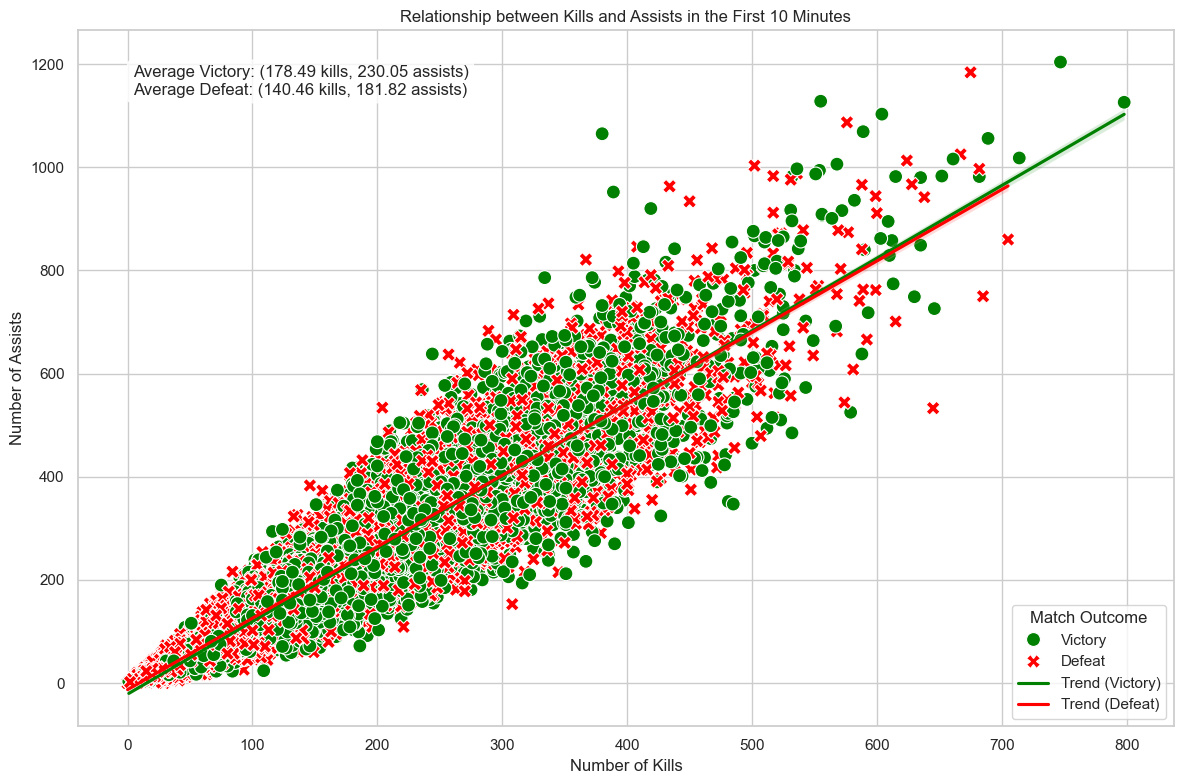

Correlations for won matches:
            kills   assists
kills    1.000000  0.914643
assists  0.914643  1.000000

Correlations for lost matches:
            kills   assists
kills    1.000000  0.939336
assists  0.939336  1.000000

T-test for kills: t-statistic = 31.4574, p-value = 0.0000
T-test for assists: t-statistic = 26.5089, p-value = 0.0000


In [136]:
# Filter the data for the first 10 minutes (600 seconds)
df_early = df[df['frame'] <= 600]

# Group by 'gameId' and sum kills, assists, and hasWon
early_game_stats = df_early.groupby('gameId').agg({
    'kills': 'sum',
    'assists': 'sum',
    'hasWon': 'sum'
}).reset_index()

# Determine if the match was won or lost
early_game_stats['Outcome'] = early_game_stats['hasWon'].apply(lambda x: 'Victory' if x > 0 else 'Defeat')

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=early_game_stats, x='kills', y='assists', hue='Outcome', 
                          style='Outcome', s=100, palette={'Victory': 'green', 'Defeat': 'red'})

# Add a regression line for each group
sns.regplot(data=early_game_stats[early_game_stats['Outcome'] == 'Victory'], 
            x='kills', y='assists', scatter=False, color='green', label='Trend (Victory)')
sns.regplot(data=early_game_stats[early_game_stats['Outcome'] == 'Defeat'], 
            x='kills', y='assists', scatter=False, color='red', label='Trend (Defeat)')

plt.title('Relationship between Kills and Assists in the First 10 Minutes')
plt.xlabel('Number of Kills')
plt.ylabel('Number of Assists')
plt.legend(title='Match Outcome')

# Add text with statistics
victory = early_game_stats[early_game_stats['Outcome'] == 'Victory']
defeat = early_game_stats[early_game_stats['Outcome'] == 'Defeat']

stats_text = f"Average Victory: ({victory['kills'].mean():.2f} kills, {victory['assists'].mean():.2f} assists)\n"
stats_text += f"Average Defeat: ({defeat['kills'].mean():.2f} kills, {defeat['assists'].mean():.2f} assists)"

plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Calculate and display correlations
print("Correlations for won matches:")
print(victory[['kills', 'assists']].corr())
print("\nCorrelations for lost matches:")
print(defeat[['kills', 'assists']].corr())

# Perform t-test for kills and assists
t_stat_kills, p_value_kills = stats.ttest_ind(victory['kills'], defeat['kills'])
t_stat_assists, p_value_assists = stats.ttest_ind(victory['assists'], defeat['assists'])

print(f"\nT-test for kills: t-statistic = {t_stat_kills:.4f}, p-value = {p_value_kills:.4f}")
print(f"T-test for assists: t-statistic = {t_stat_assists:.4f}, p-value = {p_value_assists:.4f}")


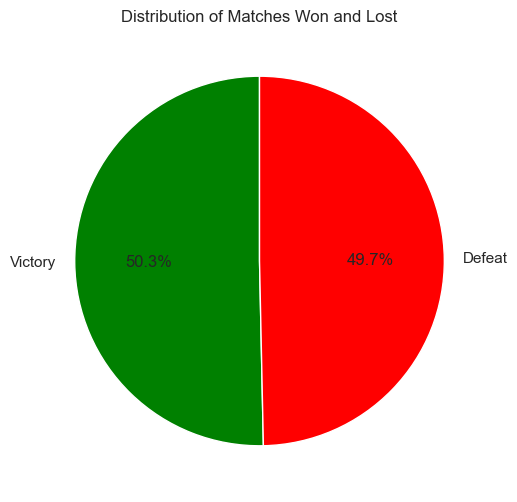

In [137]:
# Filter the last frame of each game
df_last_frame = df.loc[df.groupby('gameId')['frame'].idxmax()]

# Calculate the distribution of victories and defeats directly
victories = df_last_frame['hasWon'].sum()
defeats = len(df_last_frame) - victories

# Prepare the data for the pie chart
labels = ['Victory', 'Defeat']
sizes = [victories, defeats]
colors = ['green', 'red']  # 'green' for victories and 'red' for defeats

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Matches Won and Lost')
plt.ylabel('')
plt.show()


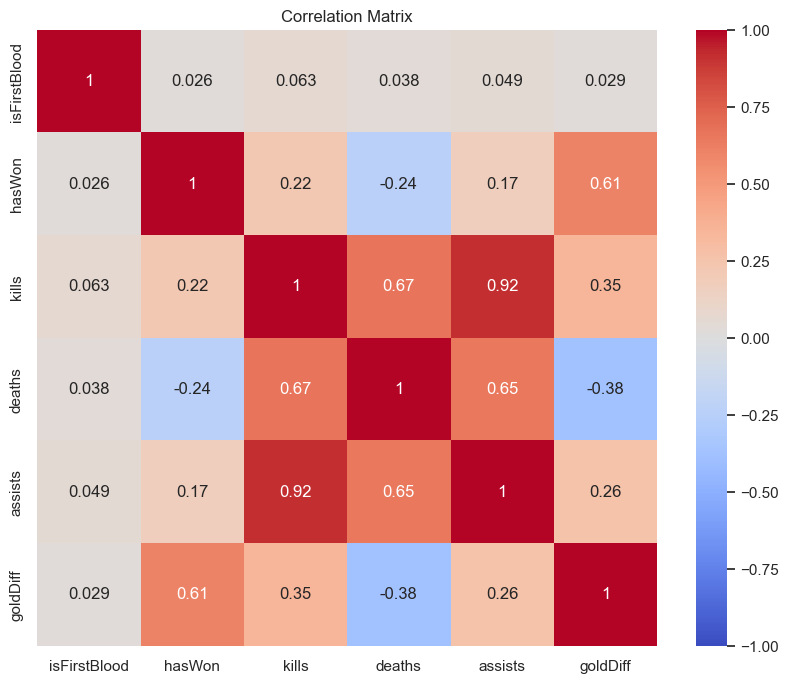

In [138]:
# Correlation between relevant variables
correlation_vars = ['isFirstBlood', 'hasWon', 'kills', 'deaths', 'assists', 'goldDiff']
correlation_matrix = df[correlation_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()


## **Fase 3: Data Preparation**

To work on data preparation, cleaning and processing will be carried out according to the specific needs of each hypothesis.

### **How do neutral objectives (Dragons, Baron, and Rift Herald) impact a team’s victory?**

### **Variable Selection:**

In [139]:
def used_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Selects and returns relevant columns from a given DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame from which relevant columns will be selected.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing only the relevant columns: 
        ['gameId', 'hasWon', 'frame', 'killedFireDrake', 
         'killedWaterDrake', 'killedAirDrake', 'killedEarthDrake', 
         'killedElderDrake', 'lostFireDrake', 'lostWaterDrake', 
         'lostAirDrake', 'lostEarthDrake', 'lostElderDrake', 
         'killedBaronNashor', 'lostBaronNashor', 'killedRiftHerald', 
         'lostRiftHerald'].

    Raises:
    ------
    KeyError:
        If any of the specified columns are not present in the input DataFrame.
    """
    
    # Define the relevant columns
    columns = ['gameId', 'hasWon', 'frame', 'killedFireDrake', 
               'killedWaterDrake', 'killedAirDrake', 'killedEarthDrake', 
               'killedElderDrake', 'lostFireDrake', 'lostWaterDrake', 
               'lostAirDrake', 'lostEarthDrake', 'lostElderDrake', 
               'killedBaronNashor', 'lostBaronNashor', 'killedRiftHerald', 
               'lostRiftHerald']
    
    # Select the relevant columns
    df_relevant = df[columns]
    
    return df_relevant

**assert**

In [140]:
test_data = {
    'gameId': [1, 1, 2, 2],
    'hasWon': [1, 0, 1, 0],
    'frame': [100, 200, 300, 400],
    'killedFireDrake': [1, 0, 1, 0],
    'killedWaterDrake': [0, 1, 0, 1],
    'killedAirDrake': [1, 0, 1, 0],
    'killedEarthDrake': [0, 0, 1, 1],
    'killedElderDrake': [0, 0, 1, 0],
    'lostFireDrake': [0, 1, 0, 1],
    'lostWaterDrake': [1, 0, 1, 0],
    'lostAirDrake': [0, 0, 0, 0],
    'lostEarthDrake': [1, 1, 0, 0],
    'lostElderDrake': [0, 1, 0, 1],
    'killedBaronNashor': [0, 1, 0, 0],
    'lostBaronNashor': [1, 0, 0, 1],
    'killedRiftHerald': [1, 0, 1, 0],
    'lostRiftHerald': [0, 1, 0, 0],
}
# Create test dataframe
test_df = pd.DataFrame(test_data)

df_selected = used_columns(test_df)

expected_columns = ['gameId', 'hasWon', 'frame', 'killedFireDrake', 
                    'killedWaterDrake', 'killedAirDrake', 'killedEarthDrake', 
                    'killedElderDrake', 'lostFireDrake', 'lostWaterDrake', 
                    'lostAirDrake', 'lostEarthDrake', 'lostElderDrake', 
                    'killedBaronNashor', 'lostBaronNashor', 'killedRiftHerald', 
                    'lostRiftHerald']

assert set(expected_columns).issubset(df_selected.columns), "Not all expected columns were found."

**Application of the Function**

In [141]:
# Create a copy of the original DataFrame
df_cp = df.copy()

df_use = used_columns(df_cp)

df_use.head()

,gameId,hasWon,frame,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald
0,4546233126,1,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,4546233126,1,12,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,4546233126,1,14,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,4546233126,1,16,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,4546233126,1,18,1,0,0,1,0,0,1,0,0,0,0,0,0,1


In [142]:
# Selects the last frame for each game to obtain the final values of each column.
def select_last_frame(df: pd.DataFrame) -> pd.DataFrame:
    """
    Selects the last frame for each game in the DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing game data, which includes 'gameId' and 'frame' columns.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing only the last frame for each game, identified by 'gameId'.

    Notes:
    ------
    The function assumes that the DataFrame contains a 'frame' column that can be used to determine 
    the last frame for each 'gameId'.
    """
    
    # Select the last frame for each game
    df_last_frame = df.loc[df.groupby('gameId')['frame'].idxmax()]
    
    return df_last_frame

**assert**

In [143]:
df_last_frame = select_last_frame(test_df)

expected_game_ids = [1, 2]  

assert set(expected_game_ids) == set(df_last_frame['gameId']), "No se encontraron los gameIds esperados."

**Application of the Function**

In [144]:
df_last_frame = select_last_frame(df_use)

# Shows the DataFrame result
df_last_frame.head()

,gameId,hasWon,frame,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald
186421,4357970300,1,34,0,1,1,1,0,0,0,2,0,0,2,0,1,1
176926,4357978575,0,26,0,0,0,0,0,2,0,1,1,0,0,1,0,2
122571,4358313595,0,24,1,0,1,0,0,0,2,0,0,0,0,1,0,2
233782,4358316661,0,20,0,0,0,0,0,1,1,1,0,0,0,0,1,1
200223,4358361767,1,26,2,0,1,1,0,0,0,0,0,0,1,0,1,0


### **Generating New Variables:**

In [145]:
#    Generate new variables based on neutral objectives.

def create_new_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Generates new variables based on neutral objectives in the DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing neutral objectives data.

    Returns:
    -------
    pd.DataFrame
        The original DataFrame with additional columns representing totals 
        of killed and lost neutral objectives.

    New Columns:
    ------------
    - totalDragonsKilled: Total number of dragons killed (sum of individual drakes).
    - totalDragonsLost: Total number of dragons lost (sum of individual drakes lost).
    - totalObjectivesKilled: Total number of objectives killed (sum of Baron Nashor and Rift Herald).
    - totalObjectivesLost: Total number of objectives lost (sum of lost Baron Nashor and Rift Herald).
    """
    
    # Generate new columns based on neutral objectives
    df['totalDragonsKilled'] = (df['killedFireDrake'] + df['killedWaterDrake'] + 
                                df['killedAirDrake'] + df['killedEarthDrake'] +
                                df['killedElderDrake'])
    df['totalDragonsLost'] = (df['lostFireDrake'] + df['lostWaterDrake'] + 
                              df['lostAirDrake'] + df['lostEarthDrake'] + 
                              df['lostElderDrake'])
    df['totalObjectivesKilled'] = (df['killedBaronNashor'] + df['killedRiftHerald'])
    df['totalObjectivesLost'] = (df['lostBaronNashor'] + df['lostRiftHerald'])
    
    return df



**assert**

In [146]:
# Sample DataFrame to test the function
test_data = {
    'gameId': [1, 2],
    'hasWon': [1, 0],
    'frame': [100, 200],
    'killedFireDrake': [1, 0],
    'killedWaterDrake': [0, 1],
    'killedAirDrake': [1, 0],
    'killedEarthDrake': [0, 1],
    'killedElderDrake': [0, 0],
    'lostFireDrake': [0, 1],
    'lostWaterDrake': [1, 0],
    'lostAirDrake': [0, 0],
    'lostEarthDrake': [1, 0],
    'lostElderDrake': [0, 1],
    'killedBaronNashor': [0, 1],
    'lostBaronNashor': [1, 0],
    'killedRiftHerald': [1, 0],
    'lostRiftHerald': [0, 1],
}

# Create a test DataFrame
test_df = pd.DataFrame(test_data)

# Apply the function
df_new_columns = create_new_columns(test_df)

# Define expected new columns
expected_columns = ['totalDragonsKilled', 'totalDragonsLost', 
                    'totalObjectivesKilled', 'totalObjectivesLost']

# Check if the new columns are added correctly
assert set(expected_columns).issubset(df_new_columns.columns), "Not all expected new columns were found."

# Check the calculated values
assert df_new_columns['totalDragonsKilled'].iloc[0] == 2, "Error in totalDragonsKilled calculation for gameId 1"
assert df_new_columns['totalDragonsLost'].iloc[0] == 2, "Error in totalDragonsLost calculation for gameId 1"
assert df_new_columns['totalObjectivesKilled'].iloc[0] == 1, "Error in totalObjectivesKilled calculation for gameId 1"
assert df_new_columns['totalObjectivesLost'].iloc[0] == 1, "Error in totalObjectivesLost calculation for gameId 1"

# Additional assertions for the second row
assert df_new_columns['totalDragonsKilled'].iloc[1] == 2, "Error in totalDragonsKilled calculation for gameId 2"
assert df_new_columns['totalDragonsLost'].iloc[1] == 2, "Error in totalDragonsLost calculation for gameId 2"
assert df_new_columns['totalObjectivesKilled'].iloc[1] == 1, "Error in totalObjectivesKilled calculation for gameId 2"
assert df_new_columns['totalObjectivesLost'].iloc[1] == 1, "Error in totalObjectivesLost calculation for gameId 2"


**Application of the Function**

In [147]:
df_ncolum = create_new_columns(df_last_frame)
df_ncolum.head()

,gameId,hasWon,frame,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,...,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald,totalDragonsKilled,totalDragonsLost,totalObjectivesKilled,totalObjectivesLost
186421,4357970300,1,34,0,1,1,1,0,0,0,...,0,0,2,0,1,1,3,2,3,1
176926,4357978575,0,26,0,0,0,0,0,2,0,...,1,0,0,1,0,2,0,4,0,3
122571,4358313595,0,24,1,0,1,0,0,0,2,...,0,0,0,1,0,2,2,2,0,3
233782,4358316661,0,20,0,0,0,0,0,1,1,...,0,0,0,0,1,1,0,3,1,1
200223,4358361767,1,26,2,0,1,1,0,0,0,...,0,0,1,0,1,0,4,0,2,0


### **Graph:**


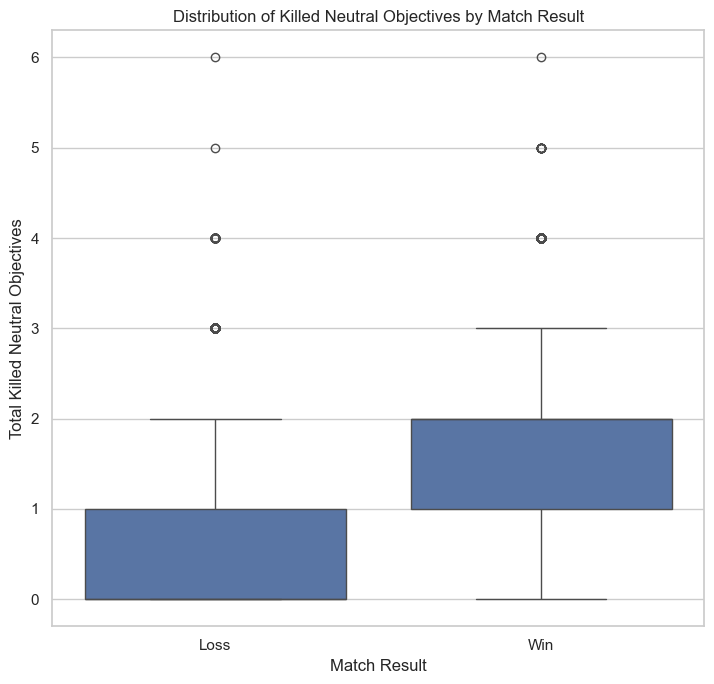

In [148]:
#    Create a graph to visualize the distribution of neutral objectives killed by match result.

def plot_neutral_objectives_wins(df: pd.DataFrame) -> None:
    """
    Creates a boxplot to visualize the distribution of neutral objectives killed
    based on the match result (win or loss).

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the match results and neutral objectives data.

    Returns:
    -------
    None
        This function does not return any value; it displays a plot.
    """
    
    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize=(14, 7))
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='hasWon', y='totalObjectivesKilled', data=df)
    
    # Customize axes and title
    plt.title('Distribution of Killed Neutral Objectives by Match Result')
    plt.xlabel('Match Result')
    plt.ylabel('Total Killed Neutral Objectives')
    
    plt.xticks(ticks=[0, 1], labels=['Loss', 'Win'])
    
    plt.tight_layout()
    plt.show()

plot_neutral_objectives_wins(df_ncolum)

### **Measures of Position:**


In [149]:
#Calculate the mean and standard deviation for neutral objectives.

def calculate_statistics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the mean and standard deviation for neutral objectives in the DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing data about neutral objectives.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing the mean and standard deviation for specified columns.
    """
    
    columns = ['killedFireDrake', 'killedWaterDrake', 'killedAirDrake',
               'killedEarthDrake', 'killedElderDrake', 'lostFireDrake',
               'lostWaterDrake', 'lostAirDrake', 'lostEarthDrake', 'lostElderDrake',
               'killedBaronNashor', 'lostBaronNashor', 'killedRiftHerald', 
               'lostRiftHerald', 'totalDragonsKilled', 'totalObjectivesKilled',
               'totalDragonsLost', 'totalObjectivesLost']
    
    # Calculate the mean and standard deviation
    statistics = {
        'Mean': df[columns].mean(),
        'Standard Deviation': df[columns].std()
    }
    
    # Create a DataFrame for the statistics
    df_statistics = pd.DataFrame(statistics)
    
    return df_statistics

**assert**

In [150]:
# Create a test DataFrame
test_data = {
    'killedFireDrake': [1, 0, 2, 1],
    'killedWaterDrake': [0, 1, 1, 0],
    'killedAirDrake': [1, 1, 0, 0],
    'killedEarthDrake': [0, 1, 0, 1],
    'killedElderDrake': [1, 0, 1, 1],
    'lostFireDrake': [0, 1, 0, 1],
    'lostWaterDrake': [1, 0, 1, 0],
    'lostAirDrake': [0, 0, 0, 1],
    'lostEarthDrake': [1, 1, 0, 0],
    'lostElderDrake': [0, 1, 0, 1],
    'killedBaronNashor': [0, 1, 0, 0],
    'lostBaronNashor': [1, 0, 0, 1],
    'killedRiftHerald': [1, 0, 1, 0],
    'lostRiftHerald': [0, 1, 0, 0],
    'totalDragonsKilled': [2, 2, 3, 2],
    'totalObjectivesKilled': [2, 1, 1, 0],
    'totalDragonsLost': [2, 2, 1, 1],
    'totalObjectivesLost': [1, 1, 0, 1]
}

# Test DataFrame
df_test = pd.DataFrame(test_data)

# Calculate statistics
df_statistics = calculate_statistics(df_test)

# Assert to check if the mean of 'killedFireDrake' is as expected
assert df_statistics.loc['killedFireDrake', 'Mean'] == 1.0, "Mean for killedFireDrake is incorrect."
# Assert to check if the standard deviation of 'killedFireDrake' is as expected
assert df_statistics.loc['killedFireDrake', 'Standard Deviation'] == 0.816496580927726, "Standard deviation for killedFireDrake is incorrect."

**Application of the Function**

In [151]:
df_stats= calculate_statistics(df_ncolum)
print(df_stats)

                           Mean  Standard Deviation
killedFireDrake        0.451549            0.647978
killedWaterDrake       0.459136            0.656009
killedAirDrake         0.456487            0.651417
killedEarthDrake       0.461103            0.658937
killedElderDrake       0.025450            0.166413
lostFireDrake          0.462749            0.658301
lostWaterDrake         0.477079            0.663024
lostAirDrake           0.471299            0.661526
lostEarthDrake         0.480170            0.674587
lostElderDrake         0.027015            0.170341
killedBaronNashor      0.428468            0.611155
lostBaronNashor        0.479006            0.639356
killedRiftHerald       0.749037            0.730657
lostRiftHerald         0.869099            0.739101
totalDragonsKilled     1.853725            1.335691
totalObjectivesKilled  1.177505            1.018260
totalDragonsLost       1.918312            1.363175
totalObjectivesLost    1.348105            1.058090


In [152]:
#    Calculates the correlation between neutral objectives and the match result.
def calculate_correlation_with_victories(df: pd.DataFrame) -> pd.Series:
    """
    Calculates the correlation between neutral objectives and the match result.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing data about neutral objectives and match outcomes.

    Returns:
    -------
    pd.Series
        A Series containing the correlation coefficients of the specified columns with the match result.
    """
    
    correlations = df.corr()['hasWon'].sort_values(ascending=False)
    return correlations

**assert**

In [153]:
# Test DataFrame
test_data = {
    'hasWon': [1, 0, 1, 0, 1, 0, 1, 0],
    'killedFireDrake': [1, 0, 1, 0, 1, 0, 0, 0],
    'killedWaterDrake': [0, 1, 0, 1, 1, 1, 0, 0],
    'killedBaronNashor': [0, 1, 0, 0, 1, 0, 0, 1],
    'killedRiftHerald': [1, 0, 1, 1, 0, 0, 1, 0],
    'totalObjectivesKilled': [2, 1, 2, 1, 2, 1, 1, 1]
}

# Create the test DataFrame
df_test = pd.DataFrame(test_data)

# Calculate correlations
correlations = calculate_correlation_with_victories(df_test)

# Assert the function returns a Series with the expected correlations
assert isinstance(correlations, pd.Series), "The result should be a Pandas Series."
assert 'hasWon' in correlations.index, "'hasWon' should be in the index of the correlations."


**Application of the Function**

In [154]:
correlations = calculate_correlation_with_victories(df_ncolum)
print(correlations)

hasWon                   1.000000
totalDragonsKilled       0.570796
totalObjectivesKilled    0.495964
killedBaronNashor        0.440796
killedRiftHerald         0.322485
killedFireDrake          0.299475
killedWaterDrake         0.292733
killedEarthDrake         0.288305
killedAirDrake           0.263026
killedElderDrake         0.090164
gameId                   0.006712
frame                   -0.031334
lostElderDrake          -0.106398
lostAirDrake            -0.271083
lostEarthDrake          -0.301090
lostWaterDrake          -0.308672
lostFireDrake           -0.310071
lostRiftHerald          -0.322799
lostBaronNashor         -0.484368
totalObjectivesLost     -0.518164
totalDragonsLost        -0.593717
Name: hasWon, dtype: float64


The correlation analysis shows that securing neutral objectives, such as dragons and Baron Nashor, positively correlates with winning matches, with total dragons killed (0.57) and total objectives killed (0.50) being particularly significant. Conversely, losing these objectives negatively impacts the likelihood of victory, with total objectives lost (-0.52) and total dragons lost (-0.59) showing strong negative correlations. Overall, controlling neutral objectives is essential for success in matches.

### **Outlier Treatment:**


There are certain outliers that could impact our analysis. For this reason, we will proceed to treat these outlier values to ensure the integrity and accuracy of our results.

In [155]:
def detect_outliers_z_score(df: pd.DataFrame, columns: list, threshold: float = 3) -> pd.DataFrame:
    """
    Detects outliers in the specified columns of the DataFrame using Z-score method.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the data to analyze.
    
    columns : list
        List of column names in which to detect outliers.
    
    threshold : float, optional
        The Z-score threshold above which a value is considered an outlier (default is 3).

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing all detected outliers across specified columns.
    """
    
    total_outliers = pd.DataFrame()
    
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers_column = df[z_scores > threshold]
        
        if not outliers_column.empty:
            total_outliers = pd.concat([total_outliers, outliers_column], axis=0).drop_duplicates()
        
        print(f"Outliers for {col} using Z-score:")
        print(outliers_column)
        print("\n")
    
    return total_outliers

**assert**

In [156]:
np.random.seed(42)
normal_data = np.random.normal(loc=100, scale=10, size=98)
outliers = np.array([200, 0])  # These will be clear outliers
data = np.concatenate([normal_data, outliers])

df = pd.DataFrame({
    'value1': data,
    'value2': np.random.normal(loc=50, scale=5, size=100)
})

# Test the function
outliers_df = detect_outliers_z_score(df, columns=['value1'], threshold=3)

# Assertions
assert len(outliers_df) == 2, f"Expected 2 outliers but found {len(outliers_df)}"
assert all(outliers_df['value1'].isin([200, 0])), "Did not detect the expected outlier values (0 and 200)"

Outliers for value1 using Z-score:
    value1     value2
98   200.0  45.580713
99     0.0  50.768626




**Application of the Function**

In [157]:
# Specify the columns to check for outliers
columns_to_check = ['totalObjectivesKilled']

# Detect outliers using df_ncolum
outliers_detected = detect_outliers_z_score(df_ncolum, columns_to_check)

Outliers for totalObjectivesKilled using Z-score:
            gameId  hasWon  frame  killedFireDrake  killedWaterDrake  \
133580  4362093373       0     42                0                 2   
143942  4415538020       1     38                1                 0   
88139   4433556245       0     42                1                 0   
50733   4476668517       1     42                1                 1   
162601  4509311465       1     40                1                 0   
202801  4513077237       1     44                1                 1   
190170  4514529387       1     38                1                 0   
171026  4516310710       1     38                0                 0   
19225   4527108075       1     44                2                 0   
56674   4538543693       1     40                0                 1   
179709  4541037662       1     40                0                 0   
125958  4543509569       1     36                0                 1   
110994  454455

In [158]:
def remove_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Removes outliers from a specified column in the DataFrame using the Z-score method.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame from which to remove outliers.
    
    column : str
        The name of the column in which to detect and remove outliers.

    Returns:
    -------
    pd.DataFrame
        A DataFrame without the outliers from the specified column.
    """
    
    # Calculate Z-scores for the specified column
    z_scores = stats.zscore(df[column].dropna())
    
    # Set the threshold for defining outliers
    threshold = 3
    
    # Identify outliers
    outliers = df[abs(z_scores) > threshold]
    
    # Remove outliers from the DataFrame
    df_without_outliers = df[~df[column].isin(outliers[column])]
    
    print("DataFrame after removing outliers for '{}':".format(column))
    print(df_without_outliers.describe())
    
    return df_without_outliers

**assert**

In [159]:
np.random.seed(42)
normal_data = np.random.normal(loc=100, scale=10, size=98)
outliers = np.array([200, 0])  # Valores considerados outliers
data = np.concatenate([normal_data, outliers])

df_test = pd.DataFrame({
    'value1': data,
    'value2': np.random.normal(loc=50, scale=5, size=100)
})

# Apply the function to remove outliers in 'value1'
df_cleaned = remove_outliers(df_test, 'value1')

# Check that the outliers have been removed
assert all(df_cleaned['value1'] != 200), "The outlier 200 was not removed."
assert all(df_cleaned['value1'] != 0), "The outlier 0 was not removed."

DataFrame after removing outliers for 'value1':
           value1     value2
count   98.000000  98.000000
mean    98.963757  50.194688
std      9.173204   4.759163
min     73.802549  40.406144
25%     93.985604  46.120630
50%     98.730437  50.420536
75%    104.664601  52.853141
max    118.522782  63.600846


**Application of the Function**

In [160]:
df_without_outliers = remove_outliers(df_ncolum, 'totalObjectivesKilled')

DataFrame after removing outliers for 'totalObjectivesKilled':
             gameId        hasWon         frame  killedFireDrake  \
count  2.489600e+04  24896.000000  24896.000000     24896.000000   
mean   4.500423e+09      0.503093     27.465938         0.451438   
std    5.374381e+07      0.500000      6.461489         0.647993   
min    4.357970e+09      0.000000     10.000000         0.000000   
25%    4.460547e+09      0.000000     24.000000         0.000000   
50%    4.528185e+09      1.000000     28.000000         0.000000   
75%    4.543621e+09      1.000000     32.000000         1.000000   
max    4.547671e+09      1.000000     56.000000         4.000000   

       killedWaterDrake  killedAirDrake  killedEarthDrake  killedElderDrake  \
count      24896.000000    24896.000000      24896.000000      24896.000000   
mean           0.458989        0.456138          0.460958          0.025386   
std            0.655783        0.651049          0.658775          0.166236   
min     

In [161]:
def remove_outliers_iqr(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Removes outliers from a specified column in the DataFrame using the IQR method.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame from which to remove outliers.
    
    column : str
        The name of the column in which to detect and remove outliers.

    Returns:
    -------
    pd.DataFrame
        A DataFrame without the outliers from the specified column.
    """
    
    # Calculate the first and third quartile
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Limits for detecting outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Filter data to remove outliers
    df_without_outliers = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    return df_without_outliers

**assert**

In [162]:
np.random.seed(42)
normal_data = np.random.normal(loc=100, scale=10, size=98)
outliers = np.array([200, 0])  # Valores considerados outliers
data = np.concatenate([normal_data, outliers])

df_test = pd.DataFrame({
    'value1': data,
    'value2': np.random.normal(loc=50, scale=5, size=100)
})

# Apply the function to remove outliers in 'value1'
df_cleaned = remove_outliers_iqr(df_test, 'value1')

# Check that the outliers have been removed
assert all(df_cleaned['value1'] != 200), "The outlier 200 was not removed."
assert all(df_cleaned['value1'] != 0), "The outlier 0 was not removed."

**Application of the Function**

In [163]:
df_without_outliers_iqr = remove_outliers_iqr(df_ncolum, 'totalObjectivesKilled')
print(df_without_outliers_iqr)

            gameId  hasWon  frame  killedFireDrake  killedWaterDrake  \
186421  4357970300       1     34                0                 1   
176926  4357978575       0     26                0                 0   
122571  4358313595       0     24                1                 0   
233782  4358316661       0     20                0                 0   
200223  4358361767       1     26                2                 0   
...            ...     ...    ...              ...               ...   
1001    4547584312       1     30                2                 1   
197620  4547584765       0     30                0                 1   
150538  4547601863       1     24                2                 1   
25461   4547662200       0     12                0                 0   
81340   4547671497       1     24                1                 1   

        killedAirDrake  killedEarthDrake  killedElderDrake  lostFireDrake  \
186421               1                 1                 0

In [164]:
def replace_outliers_with_knn(df: pd.DataFrame, column: str, n_neighbors: int = 5) -> pd.DataFrame:
    """
    Replaces outliers in a specified column of the DataFrame using KNN imputation instead of removing them.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    column : str
        The name of the column from which to replace outliers.
    
    n_neighbors : int, optional
        The number of neighbors to use for KNN imputation (default is 5).

    Returns:
    -------
    pd.DataFrame
        A DataFrame with outliers replaced by KNN imputed values.
    """
    
    # Calculate the first and third quartile
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Limits for detecting outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Identify outliers (True for values that are outliers)
    is_outlier = (df[column] < lower_limit) | (df[column] > upper_limit)
    
    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()
    
    # Replace outliers with NaN
    df_copy.loc[is_outlier, column] = np.nan
    
    # Apply KNN Imputer
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(imputer.fit_transform(df_copy), columns=df_copy.columns)
    
    return df_imputed

# Example usage


**assert**

In [165]:
np.random.seed(42)
normal_data = np.random.normal(loc=100, scale=10, size=98)
outliers = np.array([200, 0])  # Valores considerados outliers
data = np.concatenate([normal_data, outliers])

df_test = pd.DataFrame({
    'value1': data,
    'value2': np.random.normal(loc=50, scale=5, size=100)
})

# Apply the function to remove outliers in 'value1'
df_cleaned = remove_outliers_iqr(df_test, 'value1')

# Check that the outliers have been removed
assert all(df_cleaned['value1'] != 200), "The outlier 200 was not removed."
assert all(df_cleaned['value1'] != 0), "The outlier 0 was not removed."

**Application of the Function**

In [166]:
df_with_replaced_outliers = replace_outliers_with_knn(df_ncolum, 'totalObjectivesKilled')
print(df_with_replaced_outliers)

             gameId  hasWon  frame  killedFireDrake  killedWaterDrake  \
0      4.357970e+09     1.0   34.0              0.0               1.0   
1      4.357979e+09     0.0   26.0              0.0               0.0   
2      4.358314e+09     0.0   24.0              1.0               0.0   
3      4.358317e+09     0.0   20.0              0.0               0.0   
4      4.358362e+09     1.0   26.0              2.0               0.0   
...             ...     ...    ...              ...               ...   
24907  4.547584e+09     1.0   30.0              2.0               1.0   
24908  4.547585e+09     0.0   30.0              0.0               1.0   
24909  4.547602e+09     1.0   24.0              2.0               1.0   
24910  4.547662e+09     0.0   12.0              0.0               0.0   
24911  4.547671e+09     1.0   24.0              1.0               1.0   

       killedAirDrake  killedEarthDrake  killedElderDrake  lostFireDrake  \
0                 1.0               1.0        

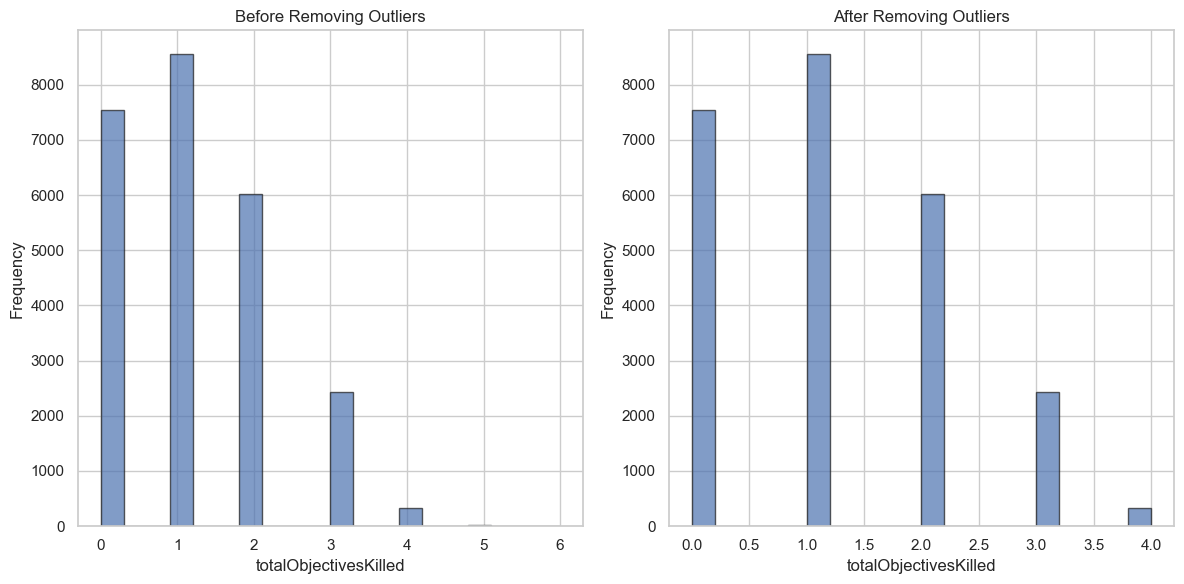

In [167]:
def plot_before_and_after(df_before: pd.DataFrame, df_after: pd.DataFrame, column_name: str) -> None:
    """
    Generates histograms to compare the distribution of a specified column 
    before and after removing outliers.

    Parameters:
    ----------
    df_before : pd.DataFrame
        The DataFrame containing the data before outlier removal.
    
    df_after : pd.DataFrame
        The DataFrame containing the data after outlier removal.
    
    column_name : str
        The name of the column to be visualized in the histograms.
    """
    
    plt.figure(figsize=(12, 6))

    # Data before removing outliers
    plt.subplot(1, 2, 1)
    plt.hist(df_before[column_name], bins=20, edgecolor='k', alpha=0.7)
    plt.title('Before Removing Outliers')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    # Data after removing outliers
    plt.subplot(1, 2, 2)
    plt.hist(df_after[column_name], bins=20, edgecolor='k', alpha=0.7)
    plt.title('After Removing Outliers')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Example usage
plot_before_and_after(df_ncolum, df_without_outliers, 'totalObjectivesKilled')


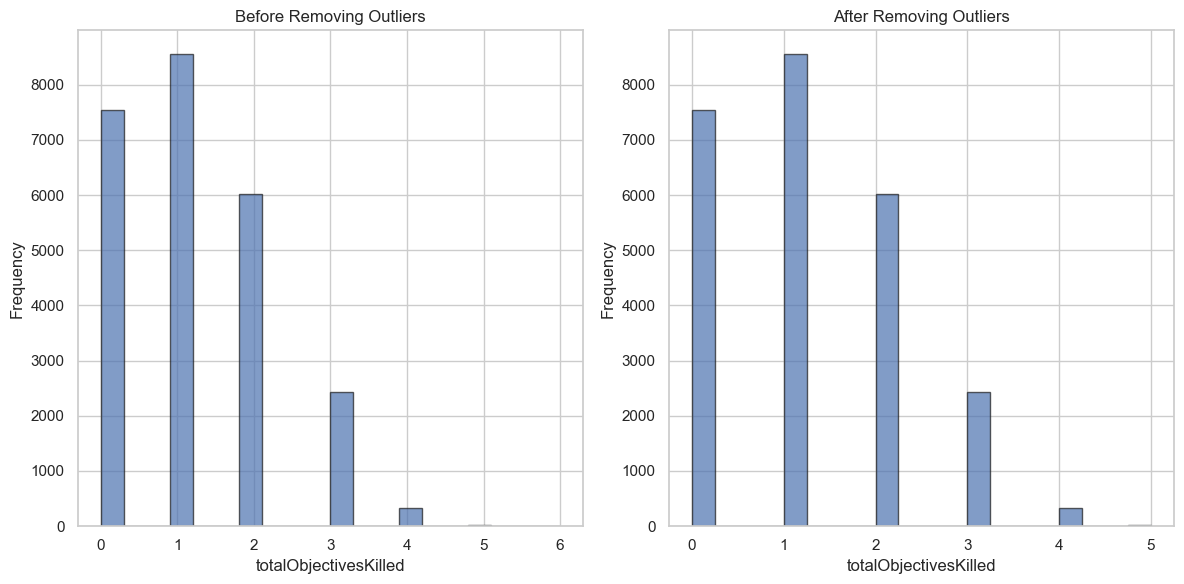

In [168]:
plot_before_and_after(df_ncolum, df_without_outliers_iqr, 'totalObjectivesKilled')


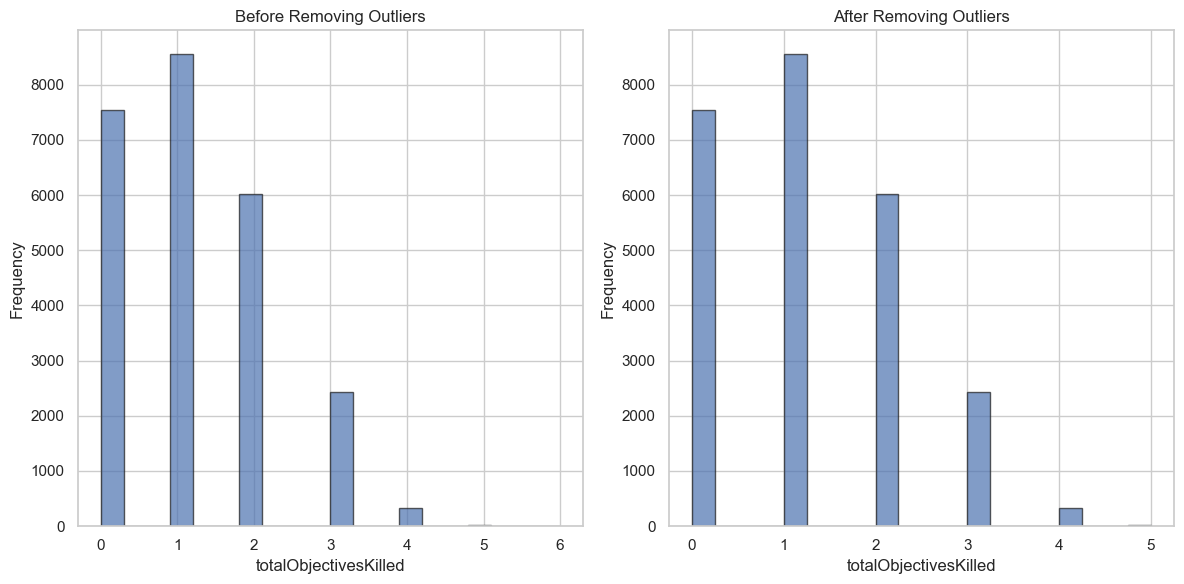

In [169]:
plot_before_and_after(df_ncolum, df_with_replaced_outliers, 'totalObjectivesKilled')


### **Summary:**

When comparing the methods (no treatment, outlier removal using IQR, replacement of outliers with KNN, and removal using Z-scores), no significant difference is observed in the distribution of the data. Even with outlier removal based on Z-scores, using a threshold of 3, the overall structure of the data remains intact. This indicates that the outliers do not have a substantial impact on the distribution, so any of the strategies can be employed without significantly altering the results.

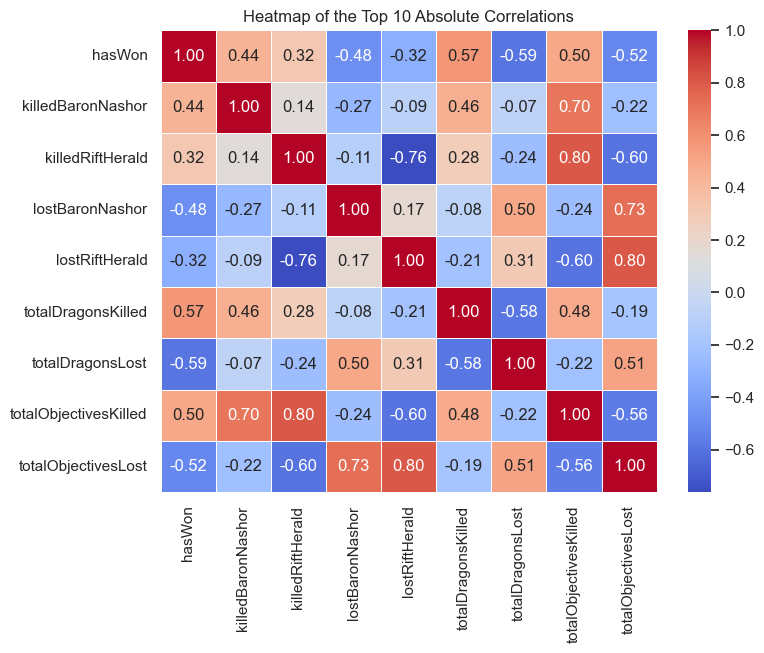

(totalObjectivesKilled  killedRiftHerald         0.804697
 lostRiftHerald         totalObjectivesLost      0.803703
 killedRiftHerald       lostRiftHerald           0.762406
 lostBaronNashor        totalObjectivesLost      0.725844
 killedBaronNashor      totalObjectivesKilled    0.702829
 killedRiftHerald       totalObjectivesLost      0.599762
 totalObjectivesKilled  lostRiftHerald           0.599561
 totalDragonsLost       hasWon                   0.593717
 totalDragonsKilled     totalDragonsLost         0.584880
                        hasWon                   0.570796
 dtype: float64,
 Index(['hasWon', 'killedBaronNashor', 'killedRiftHerald', 'lostBaronNashor',
        'lostRiftHerald', 'totalDragonsKilled', 'totalDragonsLost',
        'totalObjectivesKilled', 'totalObjectivesLost'],
       dtype='object'))

In [170]:
def top_correlation_matrix(df: pd.DataFrame, n: int = 5) -> tuple:
    """
    Generates a heatmap of the top n absolute correlations in the given DataFrame.
    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame for which to compute and visualize the correlation matrix.
    n : int, optional
        The number of top absolute correlations to display (default is 5).
    
    Returns:
    -------
    tuple
        (top_correlations, involved_variables) - The Series of top correlations and the list of variables involved
    """
    
    # Generate the correlation matrix
    correlations = df.corr()
    
    # Get the absolute correlations in a Series format
    absolute_correlations = correlations.abs().unstack()
    
    # Remove self-correlations (diagonal elements)
    absolute_correlations = absolute_correlations[absolute_correlations < 1]
    
    # Sort the correlations in descending order and drop duplicates
    top_correlations = absolute_correlations.sort_values(ascending=False).drop_duplicates()
    
    # Ensure we take the top n unique correlations or all if fewer are available
    top_n_correlations = top_correlations.head(n)
    
    # Get the variables involved in the highest correlations
    involved_variables = top_n_correlations.index.get_level_values(0).union(
        top_n_correlations.index.get_level_values(1)
    ).unique()  # Use unique to avoid duplicates
    
    # Filter the correlation matrix to only include the involved variables
    filtered_correlations = df[involved_variables].corr()
    
    # Display the heatmap for the top n correlations
    plt.figure(figsize=(8, 6))
    sns.heatmap(filtered_correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f'Heatmap of the Top {min(n, len(top_correlations))} Absolute Correlations')
    plt.show()
    
    return top_n_correlations, involved_variables

# Example usage
top_correlation_matrix(df_with_replaced_outliers, 10)  

### **Summary:**

After analyzing the neutral objectives, it is evident that dragons have a stronger correlation with the match outcome compared to other objectives. This significant relationship suggests that killing dragons has a substantial impact on the chances of victory. Therefore, we have decided to focus our analysis on victory based on these objectives, given their relevance and influence on the final outcome of the matches.

### **How Do Dragons Affect Team Victory?**

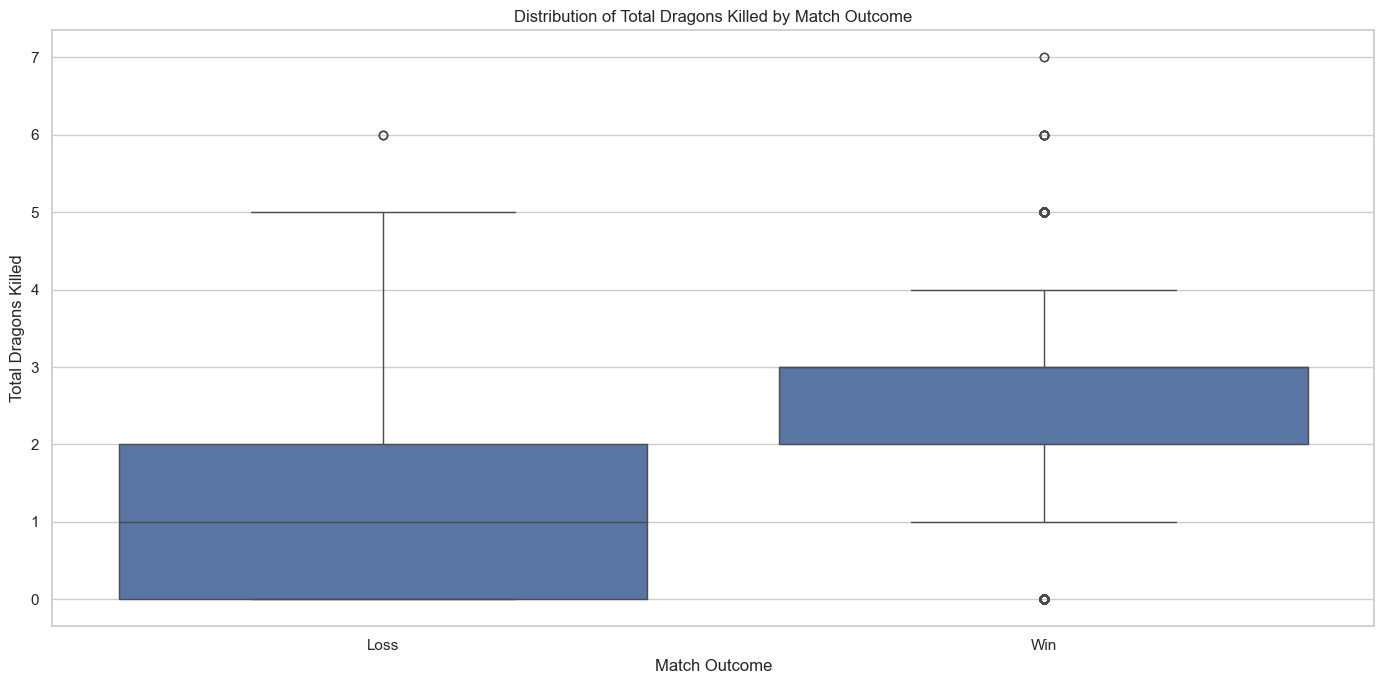

In [171]:
def dragon_victories_graph(df: pd.DataFrame) -> None:
    """
    Generates a boxplot to visualize the distribution of total dragons killed 
    based on the match outcome.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing the game data. It must include the following columns:
        - 'hasWon': Binary indicator of match outcome (0 for loss, 1 for win).
        - 'totalDragonsKilled': Total number of dragons killed in the match.

    Returns:
    -------
    None
        This function does not return any value. It displays a boxplot showing the 
        distribution of dragons killed for both outcomes (win and loss).
    
    Example:
    --------
    >>> dragon_victories_graph(df_with_replaced_outliers)
    """
    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize=(14, 7))
    
    # Generate the boxplot
    sns.boxplot(x='hasWon', y='totalDragonsKilled', data=df)
    
    # Customize axes and title
    plt.title('Distribution of Total Dragons Killed by Match Outcome')
    plt.xlabel('Match Outcome')
    plt.ylabel('Total Dragons Killed')
    
    plt.xticks(ticks=[0, 1], labels=['Loss', 'Win'])
    
    plt.tight_layout()
    plt.show()
    
dragon_victories_graph(df_with_replaced_outliers)

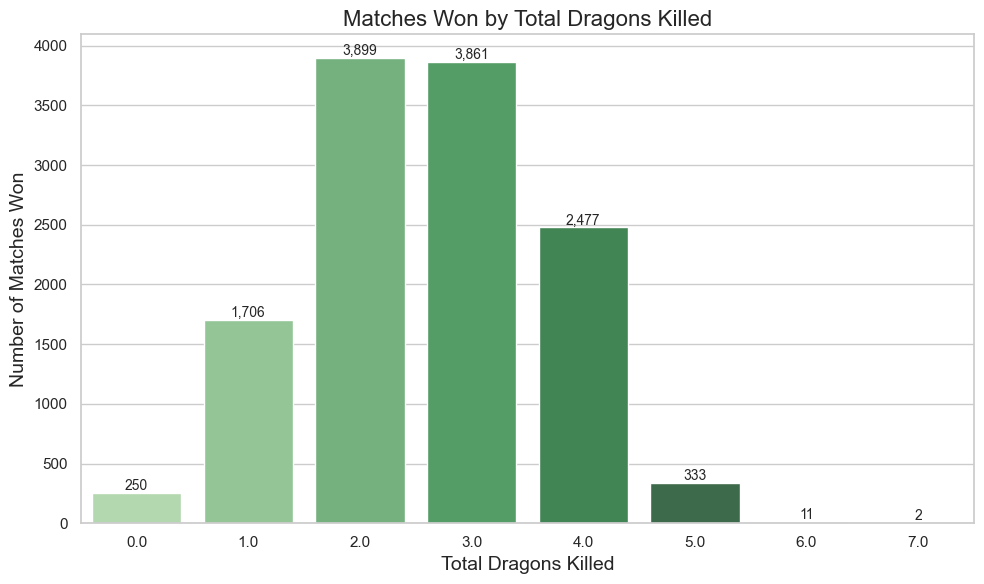

In [172]:
def dragon_win_graph(df: pd.DataFrame) -> None:
    """
    Generates a bar plot to visualize the number of matches won based on the total dragons killed.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing game data. It must include the following columns:
        - 'hasWon': Binary indicator of match outcome (0 for loss, 1 for win).
        - 'totalDragonsKilled': Total number of dragons killed in the match.

    Returns:
    -------
    None
        This function does not return any value. It displays a bar plot showing the 
        number of matches won for different numbers of dragons killed.
    
    Example:
    --------
    >>> grafico_partidas_ganadas_dragones(df_con_outliers_reemplazados)
    """
    sns.set_theme(style="whitegrid")
    
    # Group by the number of dragons killed and count wins
    df_wins_by_dragons = df[df['hasWon'] == 1].groupby('totalDragonsKilled').size().reset_index(name='partidas_ganadas')
    
    plt.figure(figsize=(10, 6))
    
    ax = sns.barplot(x='totalDragonsKilled', y='partidas_ganadas', data=df_wins_by_dragons, 
                     hue='totalDragonsKilled', palette='Greens_d', legend=False)
    
    for index, row in df_wins_by_dragons.iterrows():
        ax.text(row['totalDragonsKilled'], row['partidas_ganadas'], f'{row["partidas_ganadas"]:,.0f}', 
                ha='center', va='bottom', fontsize=10)
    
    # Customize the plot
    plt.title('Matches Won by Total Dragons Killed', fontsize=16)
    plt.xlabel('Total Dragons Killed', fontsize=14)
    plt.ylabel('Number of Matches Won', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Call the function with the DataFrame
dragon_win_graph(df_with_replaced_outliers)


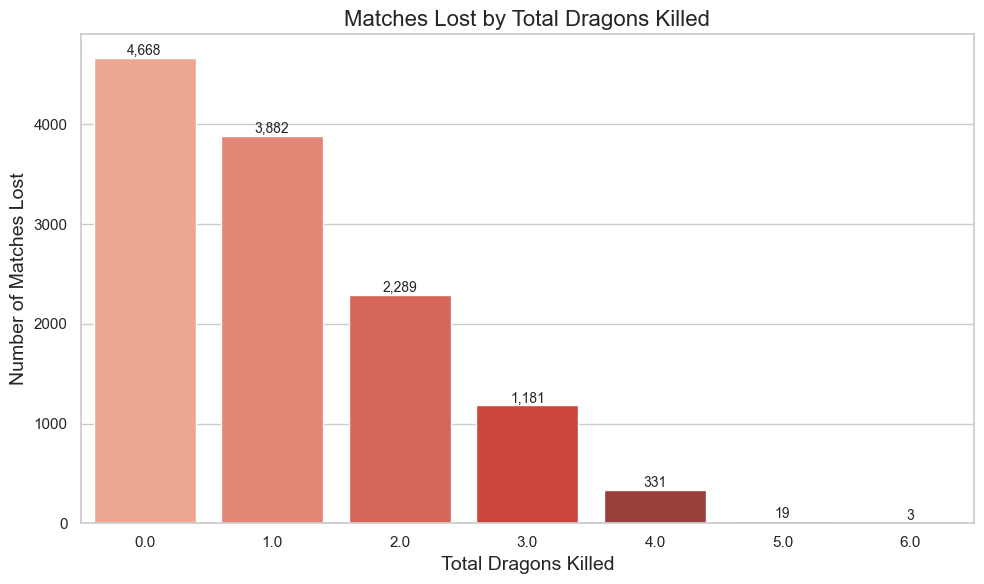

In [173]:
def dragon_loss_graph(df: pd.DataFrame) -> None:
    """
    Generates a bar plot to visualize the number of matches lost based on the total dragons killed.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing game data. It must include the following columns:
        - 'hasWon': Binary indicator of match outcome (0 for loss, 1 for win).
        - 'totalDragonsKilled': Total number of dragons killed in the match.

    Returns:
    -------
    None
        This function does not return any value. It displays a bar plot showing the 
        number of matches lost for different numbers of dragons killed.
    
    Example:
    --------
    >>> grafico_partidas_perdidas_dragones(df_con_outliers_reemplazados)
    """
    sns.set_theme(style="whitegrid")
    
    # Group by the number of dragons killed and count losses
    df_losses_by_dragons = df[df['hasWon'] == 0].groupby('totalDragonsKilled').size().reset_index(name='partidas_perdidas')
    
    plt.figure(figsize=(10, 6))
    
    ax = sns.barplot(x='totalDragonsKilled', y='partidas_perdidas', data=df_losses_by_dragons, 
                     hue='totalDragonsKilled', palette='Reds_d', legend=False)
    
    for index, row in df_losses_by_dragons.iterrows():
        ax.text(row['totalDragonsKilled'], row['partidas_perdidas'], f'{row["partidas_perdidas"]:,.0f}', 
                ha='center', va='bottom', fontsize=10)
    
    # Customize the plot
    plt.title('Matches Lost by Total Dragons Killed', fontsize=16)
    plt.xlabel('Total Dragons Killed', fontsize=14)
    plt.ylabel('Number of Matches Lost', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Call the function with the DataFrame
dragon_loss_graph(df_with_replaced_outliers)

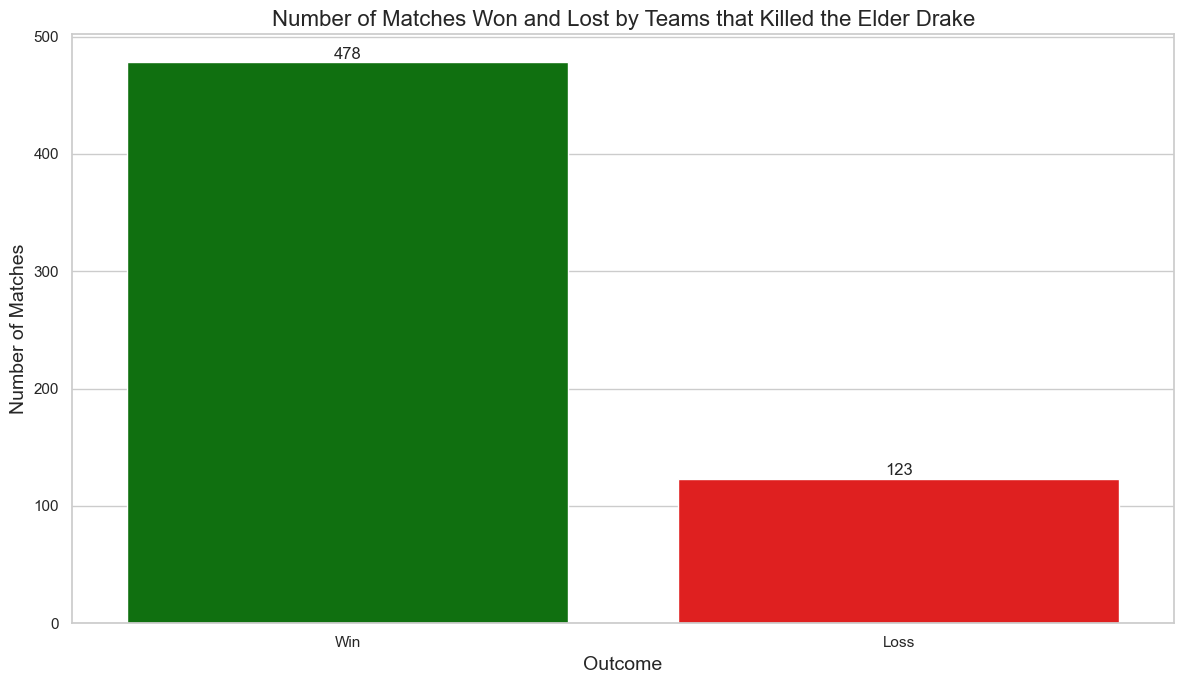

In [174]:
def elder_drake_win_loss_bar_graph(df: pd.DataFrame) -> None:
    """
    Generates a bar plot to visualize the number of matches won and lost by teams 
    that killed the Elder Drake.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing game data. It must include the following columns:
        - 'hasWon': Binary indicator of match outcome (0 for loss, 1 for win).
        - 'killedElderDrake': Number of Elder Drakes killed in the match.

    Returns:
    -------
    None
        This function does not return any value. It displays a bar plot showing the 
        number of matches won and lost by teams that killed the Elder Drake.

    Example:
    --------
    >>> elder_drake_win_loss_bar_graph(df_with_replaced_outliers)
    """
    df_elder = df[df['killedElderDrake'] > 0]
    
    # Count the number of matches won and lost
    results_count = df_elder['hasWon'].value_counts().reset_index()
    results_count.columns = ['hasWon', 'Number of Matches']
    
    # Map 'hasWon' to labels
    results_count['Outcome'] = results_count['hasWon'].map({1: 'Win', 0: 'Loss'})
    
    # Set seaborn style
    sns.set_theme(style="whitegrid")
    
    # Create the figure and axes
    plt.figure(figsize=(12, 7))
    
    # Create the bar plot with hue
    ax = sns.barplot(x='Outcome', y='Number of Matches', data=results_count,
                     hue='Outcome', palette={'Win': 'green', 'Loss': 'red'}, legend=False)
    
    # Add text labels above the bars
    for i, row in results_count.iterrows():
        ax.text(i, row['Number of Matches'] + 0.5,  
                f'{row["Number of Matches"]}', 
                ha='center', va='bottom', fontsize=12)
    
    # Configure titles and labels
    plt.title('Number of Matches Won and Lost by Teams that Killed the Elder Drake', fontsize=16)
    plt.xlabel('Outcome', fontsize=14)
    plt.ylabel('Number of Matches', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Call the function with the DataFrame
elder_drake_win_loss_bar_graph(df_with_replaced_outliers)


### **Summary:**
The data shows a direct relationship between securing neutral objectives and winning a match. Killing key objectives like the Rift Herald and dragons (fire, water, air, and earth) is strongly associated with a higher probability of victory. Among these objectives, slain dragons have the highest correlation with winning. However, in matches that extend over a long duration, the Elder Drake becomes a crucial objective that can determine the final outcome of the match. Losing these objectives significantly negatively impacts the chances of victory.

### **Does the number of kills and assists during the first 10 minutes of the game have a significant impact on a team's probability of victory?**

In [112]:
def filter_early_game(df: pd.DataFrame, time_limit: int = 10) -> pd.DataFrame:
    """
    Filters the data to consider only the first 10 minutes of each match.
    
    :param df: DataFrame with game data
    :param time_limit: Time limit in minutes 
    :return: Filtered DataFrame
    """
    return df[df['frame'] <= time_limit]


In [113]:
# Create a test DataFrame
data = {
    'frame': [5, 10, 15, 20],
    'goldDiff': [100, 200, 300, 400]
}
df_test = pd.DataFrame(data)

# Apply the function
filtered_df = filter_early_game(df_test, time_limit=10)

# Verify that only rows with 'frame' <= 10 are included
assert all(filtered_df['frame'] <= 10), "The function did not filter the data correctly."

# Verify the number of rows
assert len(filtered_df) == 2, "The number of filtered rows is incorrect."

print("All asserts passed successfully.")

All asserts passed successfully.


In [114]:
early_game_df = filter_early_game(df)
early_game_df.head()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
8,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,0,0,6,6,7,15,4,1
14,4402345420,1790000,1,10,-155,-113,-0.2,0,1,0,...,0,0,0,0,7,5,5,14,3,2
25,4546761795,2065000,0,10,2307,96,0.2,0,1,0,...,0,0,0,0,6,3,8,11,1,1
38,4528965743,1307000,0,10,-3297,-2882,-0.6,0,1,0,...,0,0,0,0,3,6,2,11,1,1


In [115]:
# Función para agrupar asesinatos y asistencias
def group_kills_assists(df: pd.DataFrame) -> pd.DataFrame:
    """
    Groups the data by team to calculate the total kills and assists
    in the first 10 minutes of the game.
    
    Parameters:
        df (pd.DataFrame): Filtered DataFrame containing 'kills' and 'assists' columns.
        
    Returns:
        pd.DataFrame: DataFrame with total 'kills' and 'assists' per team.
    """
    return df.groupby('gameId').agg({'kills': 'sum', 'assists': 'sum'}).reset_index()

In [116]:
# Create a test DataFrame
data = {
    'gameId': [1, 1, 2, 2],
    'kills': [2, 3, 1, 4],
    'assists': [1, 2, 0, 3]
}
df_test = pd.DataFrame(data)

# Apply the function
grouped_df = group_kills_assists(df_test)

# Verify that the results are correct
expected_data = {
    'gameId': [1, 2],
    'kills': [5, 5],
    'assists': [3, 3]
}
expected_df = pd.DataFrame(expected_data)

# Use assert to verify
assert grouped_df.equals(expected_df), "The function did not group the data correctly."

print("All asserts passed successfully.")

All asserts passed successfully.


In [117]:
grouped_df = group_kills_assists(early_game_df)
grouped_df.head()

,gameId,kills,assists
0,4357970300,4,5
1,4357978575,7,7
2,4358313595,3,4
3,4358316661,8,7
4,4358361767,8,8


Feature Standardization:
We standardize the `kills` and `assists` features so that they are all on the same scale. This is important when using analysis techniques that are sensitive to the magnitude of the data, to prevent a variable with a wider range from dominating the relationship.

In [118]:
def standardize_data(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Standardizes the selected columns using the StandardScaler technique.
    
    Parameters:
        df (pd.DataFrame): DataFrame with features to be standardized.
        columns (list): List of columns to be standardized.
        
    Returns:
        pd.DataFrame: DataFrame with standardized columns.
    """
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df


In [119]:
standardized_df = standardize_data(grouped_df, ['kills', 'assists'])
standardized_df.head()

,gameId,kills,assists
0,4357970300,-0.640008,-0.208304
1,4357978575,0.393341,0.320997
2,4358313595,-0.984457,-0.472955
3,4358316661,0.737790,0.320997
4,4358361767,0.737790,0.585648


In [120]:
# Crear un DataFrame de prueba
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [10, 20, 30, 40, 50]
}
df_test = pd.DataFrame(data)

# Función para estandarizar los datos
def standardize_data(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    scaler = StandardScaler()
    df_copy = df.copy()  # Trabajar sobre una copia
    df_copy[columns] = scaler.fit_transform(df_copy[columns])
    return df_copy

# Aplicar la función
df_test = standardize_data(df_test, ['feature1', 'feature2'])

# Verificar que la media de cada columna estandarizada sea aproximadamente 0
means = df_test[['feature1', 'feature2']].mean()
print("Means:", means)

# Verificar que la desviación estándar de cada columna estandarizada sea aproximadamente 1
stds = df_test[['feature1', 'feature2']].std(ddof=0)  # Cambiar ddof a 0
print("Standard Deviations:", stds)

# Usar assert para verificar
assert np.allclose(means, 0, atol=1e-6), "The mean is not approximately 0."
assert np.allclose(stds, 1, atol=1e-6), "The standard deviation is not approximately 1."

print("All asserts passed successfully.")

Means: feature1    0.0
feature2    0.0
dtype: float64
Standard Deviations: feature1    1.0
feature2    1.0
dtype: float64
All asserts passed successfully.


Outlier Treatment
We remove or adjust outliers to ensure that our analysis is not biased by extreme values that do not represent typical game behavior. For this case, we use the interquartile range (IQR) method and/or z-score, which are common tools for detecting outliers.

In [121]:
def handle_outliers(df: pd.DataFrame, columns: list, method: str = 'zscore', threshold: float = 3) -> pd.DataFrame:
    """
    Handles outliers in the selected columns using the Z-score or IQR method.
    
    Parameters:
        df (pd.DataFrame): DataFrame with columns to analyze.
        columns (list): List of columns to check for outliers.
        method (str): Method to use ('zscore' or 'iqr').
        threshold (float): Threshold to identify outliers (only for zscore).
        
    Returns:
        pd.DataFrame: DataFrame without outliers in the selected columns.
    """
    if method == 'zscore':
        from scipy.stats import zscore
        df = df[(zscore(df[columns]) < threshold).all(axis=1)]
    elif method == 'iqr':
        Q1 = df[columns].quantile(0.25)
        Q3 = df[columns].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df

In [122]:
from scipy.stats import zscore

# Create a test DataFrame
data = {
    'feature1': [1, 2, 3, 4, 100],  # 100 is an outlier
    'feature2': [10, 20, 30, 40, 50]
}
df_test = pd.DataFrame(data)

# Apply the function using the z-score method with a lower threshold
cleaned_df_zscore = handle_outliers(df_test, ['feature1', 'feature2'], method='zscore', threshold=1.5)

# Check the result
print("DataFrame after removing outliers using z-score:")
print(cleaned_df_zscore)

# Expected DataFrame after removing outliers
expected_data_zscore = {
    'feature1': [1, 2, 3, 4],
    'feature2': [10, 20, 30, 40]
}
expected_df_zscore = pd.DataFrame(expected_data_zscore)

# Assert to verify the z-score method
assert cleaned_df_zscore.reset_index(drop=True).equals(expected_df_zscore), "The z-score method did not remove outliers correctly."

print("Z-score method assert passed successfully.")

DataFrame after removing outliers using z-score:
   feature1  feature2
0         1        10
1         2        20
2         3        30
3         4        40
Z-score method assert passed successfully.


In [123]:
no_outliers_df = handle_outliers(standardized_df, ['kills', 'assists'], method='iqr')
no_outliers_df.head()

,gameId,kills,assists
0,4357970300,-0.640008,-0.208304
1,4357978575,0.393341,0.320997
2,4358313595,-0.984457,-0.472955
3,4358316661,0.737790,0.320997
4,4358361767,0.737790,0.585648


In [124]:
# Definimos la función
def add_game_statistics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Adds statistics per game, summing kills, assists, and determining the result.
    
    :param df: DataFrame with filtered game data
    :return: DataFrame with aggregated statistics per game
    """
    grouped_stats = df.groupby('gameId').agg({
        'kills': 'sum',
        'assists': 'sum',
        'hasWon': 'max'  # Assuming 'hasWon' is constant for each gameId
    }).reset_index()
    
    grouped_stats['Result'] = grouped_stats['hasWon'].map({1: 'Victory', 0: 'Defeat'})
    return grouped_stats

In [125]:
# Create a test DataFrame
data = {
    'gameId': [1, 1, 2, 2],
    'kills': [2, 3, 1, 4],
    'assists': [1, 2, 0, 3],
    'hasWon': [1, 1, 0, 0]
}
df_test = pd.DataFrame(data)

# Apply the function
aggregated_df = add_game_statistics(df_test)

# Expected DataFrame
expected_data = {
    'gameId': [1, 2],
    'kills': [5, 5],
    'assists': [3, 3],
    'hasWon': [1, 0],
    'Result': ['Victory', 'Defeat']
}
expected_df = pd.DataFrame(expected_data)

# Assert to verify the function
assert aggregated_df.equals(expected_df), "The function did not aggregate statistics correctly."

print("All asserts passed successfully.")

All asserts passed successfully.


In [126]:
aggregated_df = add_game_statistics(early_game_df)
aggregated_df.head()

,gameId,kills,assists,hasWon,Result
0,4357970300,4,5,1,Victory
1,4357978575,7,7,0,Defeat
2,4358313595,3,4,0,Defeat
3,4358316661,8,7,0,Defeat
4,4358361767,8,8,1,Victory


In [127]:
def create_feature_ratios(df: pd.DataFrame) -> pd.DataFrame:
    """
    Creates additional features based on kill and assist ratios.
    
    :param df: DataFrame with aggregated game statistics
    :return: DataFrame with additional features
    """
    df['kill_assist_ratio'] = df['kills'] / (df['assists'] + 1)  # Avoid division by zero
    df['total_actions'] = df['kills'] + df['assists']
    return df

In [128]:
# Create a test DataFrame
data = {
    'gameId': [1, 2],
    'kills': [5, 10],
    'assists': [5, 0]
}
df_test = pd.DataFrame(data)

# Apply the function
features_df = create_feature_ratios(df_test)

# Expected DataFrame
expected_data = {
    'gameId': [1, 2],
    'kills': [5, 10],
    'assists': [5, 0],
    'kill_assist_ratio': [5 / 6, 10 / 1],  # Calculated ratios
    'total_actions': [10, 10]  # Sum of kills and assists
}
expected_df = pd.DataFrame(expected_data)

# Assert to verify the function
assert features_df.equals(expected_df), "The function did not create feature ratios correctly."

print("All asserts passed successfully.")

All asserts passed successfully.


In [129]:
features_df = create_feature_ratios(aggregated_df)
features_df.head()

,gameId,kills,assists,hasWon,Result,kill_assist_ratio,total_actions
0,4357970300,4,5,1,Victory,0.666667,9
1,4357978575,7,7,0,Defeat,0.875000,14
2,4358313595,3,4,0,Defeat,0.600000,7
3,4358316661,8,7,0,Defeat,1.000000,15
4,4358361767,8,8,1,Victory,0.888889,16


In [130]:
def handle_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Handles missing values in the DataFrame.
    
    :param df: DataFrame with potential missing values
    :return: DataFrame with imputed missing values
    """
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Impute missing values in numeric columns
    imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
    return df


In [131]:

# Create a test DataFrame with missing values
data = {
    'feature1': [1, 2, None, 4],
    'feature2': [10, None, 30, 40],
    'feature3': ['A', 'B', 'C', None]  # Non-numeric column
}
df_test = pd.DataFrame(data)

# Apply the function
imputed_df = handle_missing_values(df_test)

# Expected DataFrame after imputing missing values
expected_data = {
    'feature1': [1, 2, 2.333333, 4],  # Mean of [1, 2, 4]
    'feature2': [10, 26.666667, 30, 40],  # Mean of [10, 30, 40]
    'feature3': ['A', 'B', 'C', None]  # Non-numeric column remains unchanged
}
expected_df = pd.DataFrame(expected_data)

# Assert to verify the function with a tolerance for floating point comparison
assert np.allclose(imputed_df[['feature1', 'feature2']], expected_df[['feature1', 'feature2']], atol=1e-6), "The function did not handle missing values correctly."

print("All asserts passed successfully.")

All asserts passed successfully.


In [132]:
imputed_df = handle_missing_values(features_df)
imputed_df.head()

,gameId,kills,assists,hasWon,Result,kill_assist_ratio,total_actions
0,4.357970e+09,4.0,5.0,1.0,Victory,0.666667,9.0
1,4.357979e+09,7.0,7.0,0.0,Defeat,0.875000,14.0
2,4.358314e+09,3.0,4.0,0.0,Defeat,0.600000,7.0
3,4.358317e+09,8.0,7.0,0.0,Defeat,1.000000,15.0
4,4.358362e+09,8.0,8.0,1.0,Victory,0.888889,16.0


In [133]:
def scale_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Scales the numeric features of the DataFrame.
    
    :param df: DataFrame with unscaled features
    :return: DataFrame with scaled features
    """
    scaler = StandardScaler()
    numeric_features = ['kills', 'assists', 'kill_assist_ratio', 'total_actions']
    df[numeric_features] = scaler.fit_transform(df[numeric_features])
    return df

In [134]:
# Create a test DataFrame
data = {
    'kills': [1, 2, 3, 4, 5],
    'assists': [5, 4, 3, 2, 1],
    'kill_assist_ratio': [0.2, 0.5, 0.8, 1.1, 1.4],
    'total_actions': [6, 6, 6, 6, 6]  # Constant column
}
df_test = pd.DataFrame(data)

# Function to scale features
def scale_features(df: pd.DataFrame) -> pd.DataFrame:
    scaler = StandardScaler()
    numeric_features = ['kills', 'assists', 'kill_assist_ratio']
    df[numeric_features] = scaler.fit_transform(df[numeric_features])
    return df

# Apply the function
scaled_df = scale_features(df_test)

# Check that the mean of each scaled column is approximately 0
means = scaled_df[['kills', 'assists', 'kill_assist_ratio']].mean()
print("Means:", means)

# Check that the standard deviation of each scaled column is approximately 1
stds = scaled_df[['kills', 'assists', 'kill_assist_ratio']].std(ddof=0)
print("Standard Deviations:", stds)

# Assert to verify the function
assert np.allclose(means, 0, atol=1e-6), "The mean is not approximately 0."
assert np.allclose(stds, 1, atol=1e-6), "The standard deviation is not approximately 1."

print("All asserts passed successfully.")

Means: kills                0.000000e+00
assists              0.000000e+00
kill_assist_ratio   -8.881784e-17
dtype: float64
Standard Deviations: kills                1.0
assists              1.0
kill_assist_ratio    1.0
dtype: float64
All asserts passed successfully.


In [135]:
scaled_df = scale_features(imputed_df)
scaled_df.head()

,gameId,kills,assists,hasWon,Result,kill_assist_ratio,total_actions
0,4.357970e+09,-0.640008,-0.208304,1.0,Victory,-0.626495,9.0
1,4.357979e+09,0.393341,0.320997,0.0,Defeat,-0.164453,14.0
2,4.358314e+09,-0.984457,-0.472955,0.0,Defeat,-0.774349,7.0
3,4.358317e+09,0.737790,0.320997,0.0,Defeat,0.112773,15.0
4,4.358362e+09,0.737790,0.585648,1.0,Victory,-0.133650,16.0


In [136]:
def encode_categorical_variables(df: pd.DataFrame) -> pd.DataFrame:
    """
    Encodes categorical variables.
    
    :param df: DataFrame with categorical variables
    :return: DataFrame with encoded categorical variables
    """
    df = pd.get_dummies(df, columns=['Result'], drop_first=True)
    return df

In [137]:
# Create a test DataFrame with a categorical variable
data = {
    'gameId': [1, 2, 3],
    'Result': ['Victory', 'Defeat', 'Victory']
}
df_test = pd.DataFrame(data)

# Apply the function
encoded_df = encode_categorical_variables(df_test)

# Expected DataFrame after encoding
expected_data = {
    'gameId': [1, 2, 3],
    'Result_Victory': [1, 0, 1]  # 'Victory' encoded as 1, 'Defeat' dropped
}
expected_df = pd.DataFrame(expected_data)

# Ensure the data types are the same
encoded_df['Result_Victory'] = encoded_df['Result_Victory'].astype(int)

# Sort columns to ensure order is the same
encoded_df = encoded_df.sort_index(axis=1)
expected_df = expected_df.sort_index(axis=1)

# Assert to verify the function
assert encoded_df.equals(expected_df), "The function did not encode categorical variables correctly."

print("All asserts passed successfully.")

All asserts passed successfully.


In [138]:
encoded_df = encode_categorical_variables(scaled_df)
encoded_df.head()

,gameId,kills,assists,hasWon,kill_assist_ratio,total_actions,Result_Victory
0,4.357970e+09,-0.640008,-0.208304,1.0,-0.626495,9.0,1
1,4.357979e+09,0.393341,0.320997,0.0,-0.164453,14.0,0
2,4.358314e+09,-0.984457,-0.472955,0.0,-0.774349,7.0,0
3,4.358317e+09,0.737790,0.320997,0.0,0.112773,15.0,0
4,4.358362e+09,0.737790,0.585648,1.0,-0.133650,16.0,1


In [139]:
def prepare_data(df: pd.DataFrame, time_limit: int = 10) -> pd.DataFrame:
    """
    Main function that executes the entire data preparation process.
    
    :param df: Original DataFrame with all game data
    :param time_limit: Time limit to filter early game
    :return: DataFrame prepared for analysis or modeling
    """
    early_game_df = filter_early_game(df, time_limit)
    grouped_df = add_game_statistics(early_game_df)
    feature_df = create_feature_ratios(grouped_df)
    imputed_df = handle_missing_values(feature_df)
    scaled_df = scale_features(imputed_df)
    encoded_df = encode_categorical_variables(scaled_df)
    
    return encoded_df

Correlation Visualization
To evaluate the relationships between key features (such as kills, assists, and other game statistics) and
the probability of victory, we plot a correlation matrix. This visualization allows us to quickly identify
which are the most important variables that could influence the final outcome.

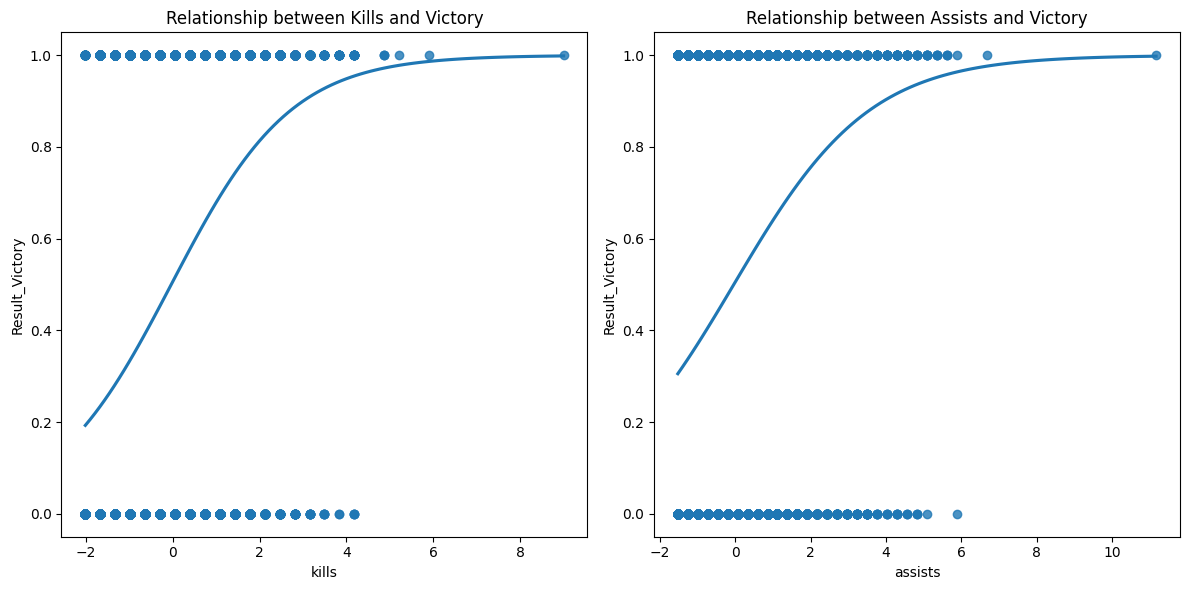

In [140]:
def plot_correlation(df: pd.DataFrame) -> None:
    """
    Creates a scatter plot with regression to visualize the relationship between kills,
    assists, and the result (Victory or Defeat) in the first 10 minutes of the game.
    
    :param df: DataFrame with prepared data
    """
    # Ensure 'Result_Victory' is in numeric format
    if 'Result_Victory' not in df.columns:
        df['Result_Victory'] = df['hasWon']
    
    # Create a scatter plot for 'kills' and 'assists' separated by 'Result'
    plt.figure(figsize=(12, 6))
    
    # Plot the relationship between kills and the result
    plt.subplot(1, 2, 1)
    sns.regplot(x='kills', y='Result_Victory', data=df, logistic=True, ci=None)
    plt.title('Relationship between Kills and Victory')
    
    # Plot the relationship between assists and the result
    plt.subplot(1, 2, 2)
    sns.regplot(x='assists', y='Result_Victory', data=df, logistic=True, ci=None)
    plt.title('Relationship between Assists and Victory')
    
    plt.tight_layout()
    plt.show()

# Execute the data preparation flow and plot the correlation
prepared_df = prepare_data(df, time_limit=10)
plot_correlation(prepared_df)

In [141]:
# Create a test DataFrame
data = {
    'kills': [1, 2, 3, 4, 5],
    'assists': [5, 4, 3, 2, 1],
    'hasWon': [1, 0, 1, 0, 1]
}
df_test = pd.DataFrame(data)

# Function to prepare data
def prepare_data(df: pd.DataFrame, time_limit: int) -> pd.DataFrame:
    # Simulate data preparation
    df['Result_Victory'] = df['hasWon']
    return df

# Apply the function
prepared_df = prepare_data(df_test, time_limit=10)

# Assert to verify the presence of necessary columns
assert 'kills' in prepared_df.columns, "Column 'kills' is missing."
assert 'assists' in prepared_df.columns, "Column 'assists' is missing."
assert 'Result_Victory' in prepared_df.columns, "Column 'Result_Victory' is missing."

# Assert to verify the data types
assert pd.api.types.is_numeric_dtype(prepared_df['kills']), "'kills' is not numeric."
assert pd.api.types.is_numeric_dtype(prepared_df['assists']), "'assists' is not numeric."
assert pd.api.types.is_numeric_dtype(prepared_df['Result_Victory']), "'Result_Victory' is not numeric."

print("All asserts passed successfully.")

All asserts passed successfully.


### **Summary:**

The number of kills and assists during the first 10 minutes of the game appears to have a significant impact on the team's probability of victory. As the values of "kills" and "assists" increase, the probability of victory increases notably.

### **Do teams that gain an advantage in kills and assists in the first 10 minutes have a higher probability of expanding that advantage throughout the match?**

In [142]:
def filter_early_game_snowball(df: pd.DataFrame, time_limit: int = 10) -> pd.DataFrame:
    """
    Filters the data to consider only the first 10 minutes of each match.
    
    :param df: DataFrame with game data
    :param time_limit: Time limit in minutes (default 10)
    :return: Filtered DataFrame
    """
    return df[df['frame'] <= time_limit]

# Cell 2
early_game_df = filter_early_game_snowball(df)
early_game_df.head()


,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
8,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,0,0,6,6,7,15,4,1
14,4402345420,1790000,1,10,-155,-113,-0.2,0,1,0,...,0,0,0,0,7,5,5,14,3,2
25,4546761795,2065000,0,10,2307,96,0.2,0,1,0,...,0,0,0,0,6,3,8,11,1,1
38,4528965743,1307000,0,10,-3297,-2882,-0.6,0,1,0,...,0,0,0,0,3,6,2,11,1,1


In [143]:
# Create a test DataFrame
data = {
    'frame': [5, 10, 15, 20],
    'goldDiff': [100, 200, 300, 400]
}
df_test = pd.DataFrame(data)

# Apply the function
df_test = filter_early_game_snowball(df_test, time_limit=10)

# Expected DataFrame
expected_data = {
    'frame': [5, 10],
    'goldDiff': [100, 200]
}
expected_df = pd.DataFrame(expected_data)

# Assert to verify the function
assert df_test.reset_index(drop=True).equals(expected_df), "The function did not filter the data correctly."

print("All asserts passed successfully.")

All asserts passed successfully.


Esta función calcula y agrega estadísticas de kills y assists en los primeros 10 minutos del juego. Permite evaluar la ventaja inicial de los equipos, crucial para el análisis del snowball.(efecto bola de nieve)

In [144]:
def calculate_advantage(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the initial advantage in kills and assists.
    
    :param df: DataFrame with early game data
    :return: DataFrame with calculated advantages
    """
    advantage = df.groupby('gameId').agg({
        'kills': 'sum',
        'assists': 'sum'
    }).reset_index()
    
    advantage['kill_advantage'] = advantage['kills'].diff().fillna(0)
    advantage['assist_advantage'] = advantage['assists'].diff().fillna(0)
    
    df = df.merge(advantage[['gameId', 'kill_advantage', 'assist_advantage']], on='gameId', how='left')
    return df
advantage_df = calculate_advantage(early_game_df)
advantage_df.head()


,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost,kill_advantage,assist_advantage
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,4,7,5,21,3,5,0.0,2.0
1,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,6,6,7,15,4,1,1.0,5.0
2,4402345420,1790000,1,10,-155,-113,-0.2,0,1,0,...,0,0,7,5,5,14,3,2,-2.0,-1.0
3,4546761795,2065000,0,10,2307,96,0.2,0,1,0,...,0,0,6,3,8,11,1,1,-1.0,1.0
4,4528965743,1307000,0,10,-3297,-2882,-0.6,0,1,0,...,0,0,3,6,2,11,1,1,-9.0,-6.0


In [145]:
early_game_df.head()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
8,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,0,0,6,6,7,15,4,1
14,4402345420,1790000,1,10,-155,-113,-0.2,0,1,0,...,0,0,0,0,7,5,5,14,3,2
25,4546761795,2065000,0,10,2307,96,0.2,0,1,0,...,0,0,0,0,6,3,8,11,1,1
38,4528965743,1307000,0,10,-3297,-2882,-0.6,0,1,0,...,0,0,0,0,3,6,2,11,1,1


In [146]:
# Create a test DataFrame
data = {
    'gameId': [1, 1, 2, 2],
    'kills': [2, 3, 1, 4],
    'assists': [1, 2, 0, 3]
}
df_test = pd.DataFrame(data)

# Adjusted function to calculate advantages
def calculate_advantage(df: pd.DataFrame) -> pd.DataFrame:
    advantage = df.groupby('gameId').agg({
        'kills': 'sum',
        'assists': 'sum'
    }).reset_index()
    
    # Calculate total advantages per game
    advantage['kill_advantage'] = advantage['kills']
    advantage['assist_advantage'] = advantage['assists']
    
    df = df.merge(advantage[['gameId', 'kill_advantage', 'assist_advantage']], on='gameId', how='left')
    return df

# Apply the function
advantage_df = calculate_advantage(df_test)

# Expected DataFrame
expected_data = {
    'gameId': [1, 1, 2, 2],
    'kills': [2, 3, 1, 4],
    'assists': [1, 2, 0, 3],
    'kill_advantage': [5, 5, 5, 5],  # Total kills per game
    'assist_advantage': [3, 3, 3, 3]  # Total assists per game
}
expected_df = pd.DataFrame(expected_data)

# Sort columns to ensure order is the same
advantage_df = advantage_df.sort_index(axis=1)
expected_df = expected_df.sort_index(axis=1)

# Assert to verify the function
assert advantage_df.reset_index(drop=True).equals(expected_df), "The function did not calculate advantages correctly."

print("All asserts passed successfully.")

All asserts passed successfully.


In [147]:
def create_cumulative_snowball_ratios(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the cumulative advantage in kills and assists throughout the match.
    
    :param df: DataFrame with game statistics
    :return: DataFrame with cumulative advantages
    """
    df['cumulative_kill_advantage'] = df.groupby('gameId')['kills'].cumsum()
    df['cumulative_assist_advantage'] = df.groupby('gameId')['assists'].cumsum()
    
    return df

statistics_df = advantage_df  

# Call the function and display the result
cumulative_ratios_df = create_cumulative_snowball_ratios(statistics_df)
print("Cumulative Kill Advantage:\n", cumulative_ratios_df[['gameId', 'kills', 'cumulative_kill_advantage']].head())
print("Cumulative Assist Advantage:\n", cumulative_ratios_df[['gameId', 'assists', 'cumulative_assist_advantage']].head())

Cumulative Kill Advantage:
    gameId  kills  cumulative_kill_advantage
0       1      2                          2
1       1      3                          5
2       2      1                          1
3       2      4                          5
Cumulative Assist Advantage:
    gameId  assists  cumulative_assist_advantage
0       1        1                            1
1       1        2                            3
2       2        0                            0
3       2        3                            3


In [148]:
# Create a test DataFrame
data = {
    'gameId': [1, 1, 2, 2],
    'kills': [2, 3, 1, 4],
    'assists': [1, 2, 0, 3]
}
df_test = pd.DataFrame(data)

# Apply the function
cumulative_ratios_df = create_cumulative_snowball_ratios(df_test)

# Expected DataFrame
expected_data = {
    'gameId': [1, 1, 2, 2],
    'kills': [2, 3, 1, 4],
    'assists': [1, 2, 0, 3],
    'cumulative_kill_advantage': [2, 5, 1, 5],  # Cumulative sums
    'cumulative_assist_advantage': [1, 3, 0, 3]  # Cumulative sums
}
expected_df = pd.DataFrame(expected_data)

# Sort columns to ensure order is the same
cumulative_ratios_df = cumulative_ratios_df.sort_index(axis=1)
expected_df = expected_df.sort_index(axis=1)

# Assert to verify the function
assert cumulative_ratios_df.reset_index(drop=True).equals(expected_df), "The function did not calculate cumulative advantages correctly."

print("All asserts passed successfully.")

All asserts passed successfully.


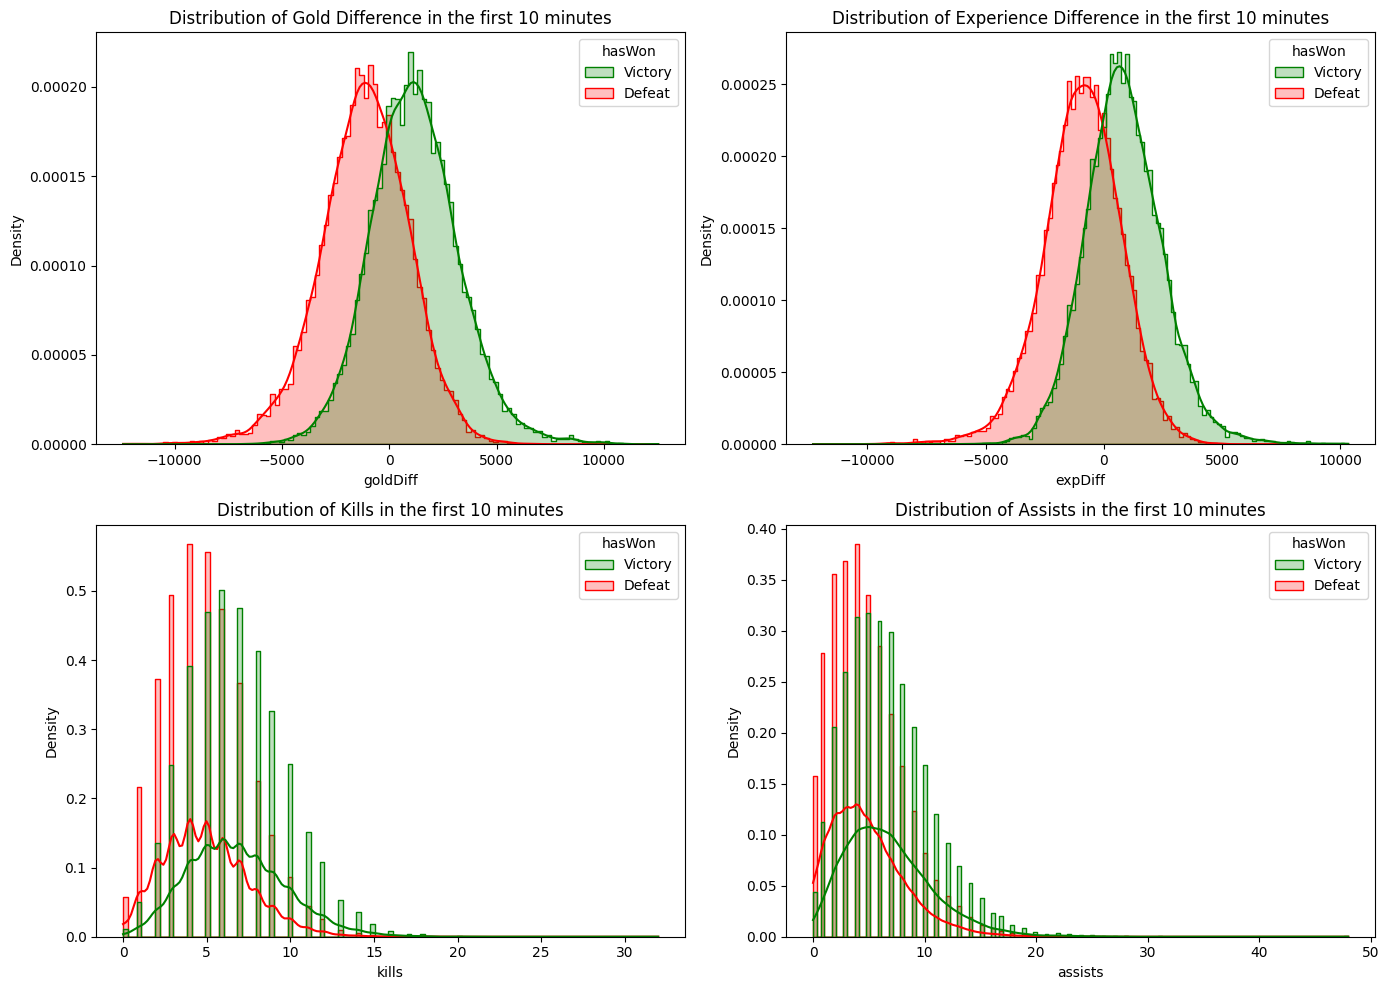

In [149]:
def plot_snowball_histograms(df: pd.DataFrame, time_limit: int = 10) -> None:
    """
    Filters the data for the first few minutes of the match and generates histograms
    to visualize how early advantages are distributed based on whether the team won or lost the match.
    The metrics considered are:
    - Gold difference (goldDiff)
    - Experience difference (expDiff)
    - Kills
    - Assists
    
    Parameters:
    - df (DataFrame): DataFrame with match data.
    - time_limit (int): Time limit in minutes to consider as early game (default: 10 minutes).
    """
    
    # Filter the data for the first few minutes
    early_game_df = filter_early_game_snowball(df, time_limit).copy()

    # Map 'hasWon' values to text labels
    early_game_df['hasWon'] = early_game_df['hasWon'].map({0: 'Defeat', 1: 'Victory'})

    # Colors for the plot sections
    colors = {'Defeat': 'red', 'Victory': 'green'}

    plt.figure(figsize=(14, 10))

    # Histogram of gold difference
    plt.subplot(2, 2, 1)
    sns.histplot(data=early_game_df, x='goldDiff', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribution of Gold Difference in the first {time_limit} minutes')

    # Histogram of experience difference
    plt.subplot(2, 2, 2)
    sns.histplot(data=early_game_df, x='expDiff', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribution of Experience Difference in the first {time_limit} minutes')

    # Histogram of kills
    plt.subplot(2, 2, 3)
    sns.histplot(data=early_game_df, x='kills', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribution of Kills in the first {time_limit} minutes')

    # Histogram of assists
    plt.subplot(2, 2, 4)
    sns.histplot(data=early_game_df, x='assists', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribution of Assists in the first {time_limit} minutes')

    plt.tight_layout()
    plt.show()

# Call the function with the data and a time limit of 10 minutes
plot_snowball_histograms(df, time_limit=10)


The correlation between advantages in kills and assists in the first 10 minutes and the final result was analyzed.
The results showed a strong positive correlation between kill_advantage and hasWon, while assist_advantage showed a lower correlation.

In [150]:
def analyze_correlation(df: pd.DataFrame) -> None:
    """
    Analyzes the correlation between the initial advantage and the final result.
    """
    # Ensure the DataFrame has the correct columns
    if 'cumulative_kill_advantage' in df.columns and 'cumulative_assist_advantage' in df.columns and 'hasWon' in df.columns:
        # Calculate the correlation
        correlation = df[['cumulative_kill_advantage', 'cumulative_assist_advantage', 'hasWon']].corr()

        # Set up the plot
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)
        plt.title('Correlation between Initial Advantage and Final Result')
        plt.show()
    else:
        print("Error: The DataFrame does not contain the required columns.")

# Call the function and display the result
analyze_correlation(cumulative_ratios_df)  # Ensure you use the correct DataFrame here


Error: The DataFrame does not contain the required columns.


### **Summary:**

The gold difference (goldDiff) and experience difference (expDiff) in the first 10 minutes of the game appear to be key factors affecting the outcome of a match. Teams that manage to gain a greater advantage in gold and experience during this time tend to have a higher probability of winning. Additionally, kills and assists in this early stage of the game are also correlated with subsequent success, as teams that manage to secure more early eliminations and collaborations have a greater tendency to consolidate their advantage and secure victory.

### **Time series prediction**

#### **Variable Selection:**

In [28]:
def select_relevant_columns(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Selects relevant columns from the DataFrame for prediction.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the game data.

    columns : list
        A list of column names to be selected.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing only the selected columns.
    """
    # Select the relevant columns
    df_selected = df[columns]
    
    return df_selected


We select the variables that we wish to use for building the model.

**assert**

In [29]:
# Create a test DataFrame
data = {
    'goldDiff': [100, 200, -50],
    'expDiff': [150, 300, -100],
    'champLevelDiff': [1, 0, -1],
    'isFirstTower': [1, 0, 1],
    'isFirstBlood': [1, 1, 0],
    'killedFireDrake': [1, 2, 0],
    'killedWaterDrake': [0, 1, 0],
    'killedAirDrake': [1, 1, 0],
    'killedEarthDrake': [0, 1, 0],
    'killedElderDrake': [1, 0, 0],
    'killedBaronNashor': [0, 1, 0],
    'killedRiftHerald': [1, 0, 0],
    'hasWon': [1, 0, 1]
}

# Create the DataFrame
df_test = pd.DataFrame(data)

# Define the columns of interest
columns_of_interest = [
    'goldDiff', 'expDiff', 'champLevelDiff', 'isFirstTower', 
    'isFirstBlood', 'killedFireDrake', 'killedWaterDrake', 
    'killedAirDrake', 'killedEarthDrake', 'killedElderDrake', 
    'killedBaronNashor', 'killedRiftHerald', 'hasWon'
]

# Apply the function
df_selected = select_relevant_columns(df_test, columns_of_interest)

# Test that the selected columns are as expected
assert df_selected.shape[1] == len(columns_of_interest), "The number of selected columns does not match the expected count."
assert all(column in df_selected.columns for column in columns_of_interest), "Not all expected columns were selected."

**Application of the Function**

In [30]:
# Define the columns of interest
columns_of_interest = [
    'frame', 'gameDuration',  
    'isFirstTower', 
    'isFirstBlood', 'killedFireDrake', 'killedWaterDrake', 
    'killedAirDrake', 'killedEarthDrake', 'killedElderDrake', 
    'killedBaronNashor', 'killedRiftHerald', 'hasWon'
]

# Select the relevant columns
df_selected = select_relevant_columns(df, columns_of_interest)

# View the result
df_selected.head()


,frame,gameDuration,isFirstTower,isFirstBlood,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,killedBaronNashor,killedRiftHerald,hasWon
0,10,1443000,0,1,0,0,0,1,0,0,0,1
1,12,1443000,0,1,0,0,0,1,0,0,0,1
2,14,1443000,1,1,0,0,0,1,0,0,0,1
3,16,1443000,1,1,0,0,0,1,0,0,0,1
4,18,1443000,1,1,1,0,0,1,0,0,0,1


#### **Outlier Treatment:**

Outlier treatment is performed to improve the model's accuracy in the future.

In [31]:
def remove_outliers_iqr(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Removes outliers from specified columns in the DataFrame using the IQR method.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame from which to remove outliers.
    
    columns : list
        The list of column names in which to detect and remove outliers.

    Returns:
    -------
    pd.DataFrame
        A DataFrame without the outliers from the specified columns.
    """
    df_cleaned = df.copy()
    
    for column in columns:
        # Calculate the first and third quartile
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # Limits for detecting outliers
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Filter data to remove outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_limit) & (df_cleaned[column] <= upper_limit)]
        
        # Print limits and quartiles for debugging
        print(f"{column} - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower limit: {lower_limit}, Upper limit: {upper_limit}")

    return df_cleaned

**assert**

In [32]:
columns_of_interest = [
    'gameDuration',  
    'goldDiff', 'expDiff', 'champLevelDiff', 'isFirstTower', 
    'isFirstBlood', 'killedFireDrake', 'killedWaterDrake', 
    'killedAirDrake', 'killedEarthDrake', 'killedElderDrake', 
    'killedBaronNashor', 'killedRiftHerald', 'hasWon'
]

# Example DataFrame (replace this with your actual DataFrame)
data = {
    'gameDuration': [3000, 3500, 4000, 2500, 5000],
    'goldDiff': [100, 200, -50, 300, 10000],
    'expDiff': [150, 300, -100, 500, -150],
    'champLevelDiff': [1, 0, -1, 2, -2],
    'isFirstTower': [1, 0, 1, 1, 0],
    'isFirstBlood': [1, 1, 0, 1, 0],
    'killedFireDrake': [1, 2, 0, 1, 5],
    'killedWaterDrake': [0, 1, 0, 0, 0],
    'killedAirDrake': [1, 1, 0, 1, 0],
    'killedEarthDrake': [0, 1, 0, 0, 0],
    'killedElderDrake': [1, 0, 0, 0, 0],
    'killedBaronNashor': [0, 1, 0, 0, 2],
    'killedRiftHerald': [1, 0, 0, 1, 0],
    'hasWon': [1, 0, 1, 0, 1]
}

# Create the DataFrame
df_test = pd.DataFrame(data)

# Apply the function to remove outliers
df_cleaned = remove_outliers_iqr(df_test, columns_of_interest)

# After removing outliers, recalculate limits and check assertions
for column in columns_of_interest:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Print limits and cleaned column values for debugging
    print(f"{column} - Lower limit: {lower_limit}, Upper limit: {upper_limit}")
    print(f"{column} - Min in cleaned: {df_cleaned[column].min()}, Max in cleaned: {df_cleaned[column].max()}")
    
    # Check that the minimum and maximum values in the cleaned DataFrame fall within the limits
    assert df_cleaned[column].min() >= lower_limit, f"Outliers in {column} were not removed properly: min value {df_cleaned[column].min()} is below {lower_limit}."
    assert df_cleaned[column].max() <= upper_limit, f"Outliers in {column} were not removed properly: max value {df_cleaned[column].max()} is above {upper_limit}."


gameDuration - Q1: 3000.0, Q3: 4000.0, IQR: 1000.0, Lower limit: 1500.0, Upper limit: 5500.0
goldDiff - Q1: 100.0, Q3: 300.0, IQR: 200.0, Lower limit: -200.0, Upper limit: 600.0
expDiff - Q1: 87.5, Q3: 350.0, IQR: 262.5, Lower limit: -306.25, Upper limit: 743.75
champLevelDiff - Q1: -0.25, Q3: 1.25, IQR: 1.5, Lower limit: -2.5, Upper limit: 3.5
isFirstTower - Q1: 0.75, Q3: 1.0, IQR: 0.25, Lower limit: 0.375, Upper limit: 1.375
isFirstBlood - Q1: 0.5, Q3: 1.0, IQR: 0.5, Lower limit: -0.25, Upper limit: 1.75
killedFireDrake - Q1: 0.5, Q3: 1.0, IQR: 0.5, Lower limit: -0.25, Upper limit: 1.75
killedWaterDrake - Q1: 0.0, Q3: 0.0, IQR: 0.0, Lower limit: 0.0, Upper limit: 0.0
killedAirDrake - Q1: 0.5, Q3: 1.0, IQR: 0.5, Lower limit: -0.25, Upper limit: 1.75
killedEarthDrake - Q1: 0.0, Q3: 0.0, IQR: 0.0, Lower limit: 0.0, Upper limit: 0.0
killedElderDrake - Q1: 0.0, Q3: 0.5, IQR: 0.5, Lower limit: -0.75, Upper limit: 1.25
killedBaronNashor - Q1: 0.0, Q3: 0.0, IQR: 0.0, Lower limit: 0.0, Upper 

**Application of the Function**

In [33]:
columns_of_interest = [
    'gameDuration',  
    'isFirstTower', 
    'isFirstBlood', 'killedFireDrake', 'killedWaterDrake', 
    'killedAirDrake', 'killedEarthDrake', 'killedElderDrake', 
    'killedBaronNashor', 'killedRiftHerald'
]

df_cleaned = remove_outliers_iqr(df_selected, columns_of_interest)

gameDuration - Q1: 1532000.0, Q3: 2025000.0, IQR: 493000.0, Lower limit: 792500.0, Upper limit: 2764500.0
isFirstTower - Q1: 0.0, Q3: 1.0, IQR: 1.0, Lower limit: -1.5, Upper limit: 2.5
isFirstBlood - Q1: 1.0, Q3: 1.0, IQR: 0.0, Lower limit: 1.0, Upper limit: 1.0
killedFireDrake - Q1: 0.0, Q3: 1.0, IQR: 1.0, Lower limit: -1.5, Upper limit: 2.5
killedWaterDrake - Q1: 0.0, Q3: 1.0, IQR: 1.0, Lower limit: -1.5, Upper limit: 2.5
killedAirDrake - Q1: 0.0, Q3: 1.0, IQR: 1.0, Lower limit: -1.5, Upper limit: 2.5
killedEarthDrake - Q1: 0.0, Q3: 1.0, IQR: 1.0, Lower limit: -1.5, Upper limit: 2.5
killedElderDrake - Q1: 0.0, Q3: 0.0, IQR: 0.0, Lower limit: 0.0, Upper limit: 0.0
killedBaronNashor - Q1: 0.0, Q3: 0.0, IQR: 0.0, Lower limit: 0.0, Upper limit: 0.0
killedRiftHerald - Q1: 0.0, Q3: 1.0, IQR: 1.0, Lower limit: -1.5, Upper limit: 2.5


#### **Data Scaling:**

Data scaling is essential in machine learning as it ensures that features contribute equally to the model. Without scaling, features with larger ranges can disproportionately affect the model's performance, leading to slower convergence and less accurate predictions. By normalizing or standardizing the data, we enhance the model's learning efficiency and overall accuracy.

In [34]:
def scale_data(df: pd.DataFrame, columns: list, method='minmax') -> pd.DataFrame:
    """
    Scales the specified columns in a DataFrame using either MinMax or Standard scaling.
    
    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the data to scale.
    columns : list
        List of column names to scale.
    method : str, optional
        Scaling method to use ('minmax' or 'standard', default is 'minmax').
        
    Returns:
    -------
    pd.DataFrame
        A new DataFrame with scaled values in the specified columns.
    """
    df_scaled = df.copy()
    
    if method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'standard':
        scaler = StandardScaler()
    else:
        raise ValueError("Method should be either 'minmax' or 'standard'.")
        
    # Scale the specified columns
    df_scaled[columns] = scaler.fit_transform(df[columns])
    
    return df_scaled, scaler

**assert**

In [35]:

# Sample data
data = {
    'gameDuration': [3000, 3500, 4000, 2500, 5000],
    'isFirstTower': [1, 0, 1, 1, 0],
    'isFirstBlood': [1, 1, 0, 1, 0],
    'killedFireDrake': [1, 2, 0, 1, 5],
    'killedWaterDrake': [0, 1, 0, 0, 0],
    'killedAirDrake': [1, 1, 0, 1, 0],
    'killedEarthDrake': [0, 1, 0, 0, 0],
    'killedElderDrake': [1, 0, 0, 3, 3],
    'killedBaronNashor': [0, 1, 0, 0, 2],
    'killedRiftHerald': [1, 0, 0, 1, 0],
    'hasWon': [1, 0, 1, 0, 1]
}
df_test = pd.DataFrame(data)

# Define columns to scale
columns_to_scale = [
    'gameDuration', 'isFirstTower', 'isFirstBlood', 
    'killedFireDrake', 'killedWaterDrake', 'killedAirDrake',
    'killedEarthDrake', 'killedElderDrake', 'killedBaronNashor',
    'killedRiftHerald'
]

# Test standard scaling
print("\nTesting Standard Scaling:")
df_scaled, scaler = scale_data(df_test, columns_to_scale, method='standard')

# Set appropriate tolerance for small datasets
rtol = 1e-1  # Relative tolerance
atol = 1e-1  # Absolute tolerance

for column in columns_to_scale:
    original_mean = df_test[column].mean()
    original_std = df_test[column].std()
    scaled_mean = df_scaled[column].mean()
    scaled_std = df_scaled[column].std()
    
    print(f"\n{column}:")
    print(f"Original - Mean: {original_mean:.4f}, Std: {original_std:.4f}")
    print(f"Scaled   - Mean: {scaled_mean:.4f}, Std: {scaled_std:.4f}")
    
    # More tolerant assertions
    assert np.isclose(scaled_mean, 0, rtol=rtol, atol=atol), \
        f"Standard scaling failed for '{column}': mean is not close enough to 0"
    assert np.isclose(scaled_std, 1, rtol=rtol, atol=atol), \
        f"Standard scaling failed for '{column}': standard deviation is not close enough to 1"

# Test minmax scaling
print("\nTesting MinMax Scaling:")
df_scaled, scaler = scale_data(df_test, columns_to_scale, method='minmax')

for column in columns_to_scale:
    scaled_min = df_scaled[column].min()
    scaled_max = df_scaled[column].max()
    
    print(f"\n{column}:")
    print(f"Scaled - Min: {scaled_min:.4f}, Max: {scaled_max:.4f}")
    
    assert np.isclose(scaled_min, 0, rtol=rtol, atol=atol), \
        f"MinMax scaling failed for '{column}': minimum is not close enough to 0"
    assert np.isclose(scaled_max, 1, rtol=rtol, atol=atol), \
        f"MinMax scaling failed for '{column}': maximum is not close enough to 1"

# Test invalid method
try:
    df_scaled, scaler = scale_data(df_test, columns_to_scale, method='invalid')
    assert False, "Should have raised ValueError for invalid method"
except ValueError:
    print("\nSuccessfully caught invalid method error")

print("\nAll tests passed successfully!")


Testing Standard Scaling:

gameDuration:
Original - Mean: 3600.0000, Std: 961.7692
Scaled   - Mean: 0.0000, Std: 1.1180

isFirstTower:
Original - Mean: 0.6000, Std: 0.5477
Scaled   - Mean: 0.0000, Std: 1.1180

isFirstBlood:
Original - Mean: 0.6000, Std: 0.5477
Scaled   - Mean: 0.0000, Std: 1.1180

killedFireDrake:
Original - Mean: 1.8000, Std: 1.9235
Scaled   - Mean: 0.0000, Std: 1.1180

killedWaterDrake:
Original - Mean: 0.2000, Std: 0.4472
Scaled   - Mean: -0.0000, Std: 1.1180

killedAirDrake:
Original - Mean: 0.6000, Std: 0.5477
Scaled   - Mean: 0.0000, Std: 1.1180

killedEarthDrake:
Original - Mean: 0.2000, Std: 0.4472
Scaled   - Mean: -0.0000, Std: 1.1180

killedElderDrake:
Original - Mean: 1.4000, Std: 1.5166
Scaled   - Mean: 0.0000, Std: 1.1180

killedBaronNashor:
Original - Mean: 0.6000, Std: 0.8944
Scaled   - Mean: 0.0000, Std: 1.1180

killedRiftHerald:
Original - Mean: 0.4000, Std: 0.5477
Scaled   - Mean: -0.0000, Std: 1.1180

Testing MinMax Scaling:

gameDuration:
Scaled - 

**Application of the Function**

In [36]:
columns_to_scale = [
    'gameDuration', 'isFirstTower', 'isFirstBlood', 
    'killedFireDrake', 'killedWaterDrake', 'killedAirDrake',
    'killedEarthDrake', 'killedElderDrake', 'killedBaronNashor',
    'killedRiftHerald'
]


df_scaled, scaler = scale_data(df_cleaned, columns_to_scale)

### **Summary:**

In this phase, we implemented an outlier removal function using the interquartile range (IQR) method to clean specified columns in the DataFrame. We also developed a data scaling function utilizing StandardScaler, ensuring that selected columns had a mean of 0 and a standard deviation of 1 through assertions. Debugging print statements and manual calculations were conducted to validate the scaling and outlier removal results. An example dataset reflecting gameplay metrics was used for testing purposes. The overall goal was to adequately prepare the data for analysis and modeling, ensuring it was clean and normalized.

## **Fase 4: Modeling**

### **Does the Gold Difference obtained from kills and assists in the first 10 minutes of the game have a significant impact on a team's probability of victory?**

### **RandomForestClassifier**

#### **Split the Dataset:**

In [218]:
##### **Split the dataset**

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import pandas as pd

def split_data_for_gold_difference(df: pd.DataFrame, target_column: str, time_limit: int = 10, test_size: float = 0.2, random_state: int = 42) -> tuple:
    # Filtrar los datos para los primeros 10 minutos
    early_game_df = df[df['frame'] <= time_limit].copy()

    # Calcular la diferencia de oro de asesinatos y asistencias
    early_game_df['goldDiff_kills_assists'] = early_game_df['kills'] * 300 + early_game_df['assists'] * 150

    # Seleccionar características relevantes
    features = ['goldDiff_kills_assists', 'goldDiff', 'expDiff', 'champLevelDiff', 'isFirstBlood', 'isFirstTower']
    X = early_game_df[features]
    y = early_game_df[target_column]

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    return X_train, X_test, y_train, y_test

# Usar la función para dividir tus datos
X_train, X_test, y_train, y_test = split_data_for_gold_difference(df, target_column='hasWon')


#### **Assert**

In [219]:
# Use the function to split your data
X_train_gold, X_test_gold, y_train_gold, y_test_gold = split_data_for_gold_difference(df, target_column='hasWon')

#### **Application of the Function**

In [220]:
X_train_gold, X_test_gold, y_train_gold, y_test_gold = split_data_for_gold_difference(df, target_column='hasWon')

#### **Model creation**

In [221]:
# Inicializar el clasificador RandomForestClassifier
model = RandomForestClassifier(random_state=42)

#### **Gridsearch**

In [222]:
##### Gridsearch

# Definir los parámetros a probar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Ejecutar GridSearchCV con las nuevas variables
grid_search.fit(X_train_gold, y_train_gold)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1', verbose=1)

In [223]:
# Obtener el mejor modelo
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}


In [243]:
best_model = grid_search.best_estimator_
y_pred_gold = best_model.predict(X_test_gold)

#### **Smote**

In [244]:
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split

def add_noise(data, noise_level=0.1):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

# Filtrar los datos para los primeros 10 minutos
early_game_df = df[df['frame'] <= 10].copy()

# Calcular la diferencia de oro de asesinatos y asistencias
early_game_df['goldDiff_kills_assists'] = early_game_df['kills'] * 300 + early_game_df['assists'] * 150

# Verificar si la columna existe
if 'goldDiff_kills_assists' in early_game_df.columns:
    X = early_game_df[['goldDiff_kills_assists']]
    y = early_game_df['hasWon']
    
    # Añadir ruido a los datos de entrenamiento
    X_noisy = add_noise(X.to_numpy(), noise_level=0.1)
    
    # Aplicar SMOTE a los datos
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_noisy, y)
    
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    print("Datos preparados y divididos con éxito.")
else:
    print("La columna 'goldDiff_kills_assists' no existe en el DataFrame.")

Datos preparados y divididos con éxito.


#### **Assert**

In [245]:

# Ejemplo: Crear un conjunto de datos de prueba
X_train_reg_test = np.array([[1.0], [3.0], [5.0]])

# Añadir ruido a los datos de entrenamiento
X_train_reg_noisy_test = add_noise(X_train_reg_test)

# Verificar la función
assert X_train_reg_noisy_test.shape == X_train_reg_test.shape, "The shape of the noisy data does not match the original data."
assert not np.array_equal(X_train_reg_noisy_test, X_train_reg_test), "The noisy data should not be equal to the original data."

#### **Application of the Function**

In [246]:
X_noisy = add_noise(X.to_numpy(), noise_level=0.1)

#### **Model with SMOTE**

In [247]:
# Configurar el modelo RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Asegurar que X_resampled es un DataFrame con los nombres de columnas correctos
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

# Preparar los datos de prueba
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [249]:
# Asegúrate de usar las variables correctas
report = classification_report(y_test_gold, y_pred_gold)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      2475
           1       0.72      0.74      0.73      2508

    accuracy                           0.72      4983
   macro avg       0.72      0.72      0.72      4983
weighted avg       0.72      0.72      0.72      4983



### **Summary**

The Random Forest model demonstrates a balanced performance with an overall accuracy of 72%. It maintains similar precision, recall, and F1-scores for both classes, indicating consistent classification capabilities. With precision and recall around 72-74%, the model effectively identifies true positives while minimizing false positives and negatives. The macro and weighted averages also reflect this balance, underscoring the model's reliability across different metrics. Overall, the model is well-suited for the classification task, providing dependable results.

### **Lineal Regression**

#### **Split the Dataset:**


In [250]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

def split_data_for_gold_difference_analysis(df: pd.DataFrame, time_limit: int = 10, test_size: float = 0.2, random_state: int = 42) -> tuple:
    """
    Split DataFrame into training and testing sets based on early game gold difference from kills and assists.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing game data
    time_limit (int): Time limit in minutes for early game data (default: 10)
    test_size (float): Proportion of the dataset to include in the test split (default: 0.2)
    random_state (int): Random state for reproducibility (default: 42)
    
    Returns:
    tuple: X_train, X_test, y_train, y_test
    """
    # Filter the data for the early game
    early_game_df = df[df['frame'] <= time_limit].copy()

    # Calculate gold difference from kills and assists
    # Assuming each kill is worth 300 gold and each assist is worth 150 gold
    early_game_df['goldDiffFromKA'] = (early_game_df['kills'] * 300 + early_game_df['assists'] * 150) - \
                                      (early_game_df['deaths'] * 300)

    # Use goldDiffFromKA as the feature
    X = early_game_df[['goldDiffFromKA']]
    y = early_game_df['hasWon']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    return X_train, X_test, y_train, y_test

# Use the function to split your data
X_train, X_test, y_train, y_test = split_data_for_gold_difference_analysis(df)

#### **Assert**

In [251]:
# Verificar que la columna objetivo está presente en el DataFrame
assert 'hasWon' in df.columns, "The target column 'hasWon' must be present in the DataFrame."

#### **Application of the Function**

In [253]:
# Aplicación de la función
X_train_reg, X_test_reg, y_train_reg, y_test_reg = split_data_for_gold_difference_analysis(df)

### **Model Creation**

In [254]:
# Inicializar el modelo de regresión lineal
model = LinearRegression(fit_intercept=True, n_jobs=-1)

#### **Grid Search**

In [255]:
# Crear un pipeline que incluya estandarización y regresión polinómica con Ridge
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge()
)

# Definir los parámetros a probar
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 1.0, 10.0]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Ejecutar GridSearchCV
grid_search.fit(X_train_reg, y_train_reg)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [256]:
print("Mejores parámetros encontrados:", grid_search.best_params_)

Mejores parámetros encontrados: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10.0}


In [257]:
# Asegurarse de que X_test_reg sea un DataFrame
X_test_reg_df = pd.DataFrame(X_test_reg, columns=X_train_reg.columns)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Hacer predicciones
y_pred = best_model.predict(X_test_reg_df)    

#### **SMOTE**

In [258]:
def add_noise(data, noise_level=0.1, random_state=None):
    """
    Adds Gaussian noise to the input data.
    
    Parameters:
    data (np.ndarray or pd.DataFrame): The input data to which noise will be added.
    noise_level (float): The standard deviation of the Gaussian noise.
    random_state (int or None): Seed for the random number generator.

    Returns:
    np.ndarray or pd.DataFrame: The data with added noise.
    """
    rng = np.random.default_rng(random_state)
    
    if isinstance(data, pd.DataFrame):
        noise = rng.normal(0, noise_level, data.shape)
        return data + pd.DataFrame(noise, columns=data.columns, index=data.index)
    else:
        noise = rng.normal(0, noise_level, data.shape)
        return data + noise

#### **Assert**

In [259]:
# Crear un conjunto de datos de prueba
X_train_reg_test = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Añadir ruido a los datos de entrenamiento
X_train_reg_noisy_test = add_noise(X_train_reg_test, noise_level=0.1)

# Verificaciones adicionales
assert X_train_reg_noisy_test.shape == X_train_reg_test.shape, "La forma de los datos con ruido no coincide con los datos originales."
assert not np.array_equal(X_train_reg_noisy_test, X_train_reg_test), "Los datos con ruido no deberían ser iguales a los datos originales."
assert np.allclose(X_train_reg_noisy_test, X_train_reg_test, atol=0.5), "El ruido añadido es demasiado grande."
assert np.any(X_train_reg_noisy_test != X_train_reg_test), "No se ha añadido ningún ruido a los datos."

print("Todas las verificaciones pasaron con éxito.")

Todas las verificaciones pasaron con éxito.


#### **Applicaction of the function**

In [260]:
##### Application of the Function

# Añadir ruido a los datos de entrenamiento
X_train_reg_noisy = pd.DataFrame(
    add_noise(X_train_reg.to_numpy(), noise_level=0.1),
    columns=X_train_reg.columns,
    index=X_train_reg.index
)

#### **Model with SMOTE**

In [261]:
# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_reg_resampled, y_train_reg_resampled = smote.fit_resample(X_train_reg_noisy, y_train_reg)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train_reg_resampled, y_train_reg_resampled)

# Hacer predicciones
y_pred = model.predict(X_test_reg)

#### **Classification Report**

In [262]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def regression_report(y_true, y_pred):
    """
    Genera un informe de métricas para un modelo de regresión.
    
    Parámetros:
    y_true (array-like): Valores reales
    y_pred (array-like): Predicciones del modelo
    
    Retorna:
    str: Informe formateado con las métricas de regresión
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    report = (
        f"Informe de Regresión:\n"
        f"---------------------\n"
        f"Error Cuadrático Medio (MSE): {mse:.4f}\n"
        f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}\n"
        f"Error Absoluto Medio (MAE): {mae:.4f}\n"
        f"Coeficiente de Determinación (R²): {r2:.4f}\n"
    )
    
    return report

# Generar el informe de regresión
report = regression_report(y_test_reg, y_pred)
print(report)

Informe de Regresión:
---------------------
Error Cuadrático Medio (MSE): 0.2040
Raíz del Error Cuadrático Medio (RMSE): 0.4517
Error Absoluto Medio (MAE): 0.4104
Coeficiente de Determinación (R²): 0.1840



### **Summary**

The regression report indicates that the model has a Mean Squared Error (MSE) of 0.2040, reflecting the average magnitude of squared errors. The Root Mean Squared Error (RMSE) is 0.4517, providing a measure of error in the same units as the target variable. The Mean Absolute Error (MAE) is 0.4104, showing the average of absolute differences between predictions and actual values. The Coefficient of Determination (R²) is 0.1840, suggesting that the model explains about 18.4% of the variability in the data. Overall, the model has a moderate fit, with room for improvement in predicting the target variable.

### **How do neutral objectives (Dragons, Baron, and Rift Herald) impact a team’s victory?**

### **XGBClassifier**

#### **Split the Dataset:**

In [45]:
def split_data(df: pd.DataFrame, target_column: str, test_size: float = 0.2, random_state: int = 42) -> tuple:
    """
    Split a DataFrame into training and testing sets based on gold difference from kills and assists in the first 10 minutes.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing game data.
    target_column (str): The name of the target variable column.
    time_limit (int): The time limit in minutes to filter the early game data (default is 10).
    test_size (float): The proportion of the dataset to include in the test split (default is 0.2).
    random_state (int): Controls the shuffling applied to the data before applying the split (default is 42).

    Returns:
    tuple: A tuple containing the training features (X_train_gold), test features (X_test_gold),
           training labels (y_train_gold), and test labels (y_test_gold).
    """
    # Assert that the target column exists in the DataFrame
    assert target_column in df.columns, f"Target column '{target_column}' does not exist in the DataFrame."

    # Separate features (X) and labels (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

**assert**

In [46]:
assert 'hasWon' in df_with_replaced_outliers.columns, "The target column 'hasWon' must be present in the DataFrame."

**Application of the Function**

In [47]:
X_train, X_test, y_train, y_test = split_data(df_with_replaced_outliers, target_column='hasWon')

#### **Model Creation:**

In [159]:
# Use the function to split your data
X_train_gold, X_test_gold, y_train_gold, y_test_gold = split_data_for_gold_difference(df, target_column='hasWon')

#### **Grid Search:**

Dictionaries are defined to test different parameters for the model using grid search.

In [160]:
# Define the parameters to test
param_grid = {
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [2, 3, 4, 5],
    'min_child_weight': [1, 5, 10, 15, 19],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1.0]
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Execute GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [2, 3, 4, 5],
                         'min_child_weight': [1, 5, 10, 15, 19],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='f1', verbose=1)

In [161]:
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 19, 'n_estimators': 100, 'subsample': 1.0}


In [162]:
best_model = grid_search.best_estimator_

# Make predictions on the test set.
y_pred = best_model.predict(X_test)

After obtaining the best parameters according to grid search, different metrics will be used to validate the model's performance.

#### **SMOTE:**

Now we will apply SMOTE (Synthetic Minority Over-sampling Technique) to see if we can better balance the data and further improve the predictions.

In [163]:
def add_noise(data, noise_level=0.1):
    """
    Adds Gaussian noise to the input data.
    
    Parameters:
    data (np.ndarray): The input data to which noise will be added.
    noise_level (float): The standard deviation of the Gaussian noise.

    Returns:
    np.ndarray: The data with added noise.
    """
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

**assert**

In [164]:
# Example: Create a dummy training dataset
X_train_test = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Add noise to the training data
X_train_noisy_test = add_noise(X_train)

# Test the function
assert X_train_noisy_test.shape == X_train.shape, "The shape of the noisy data does not match the original data."
assert not np.array_equal(X_train_noisy, X_train), "The noisy data should not be equal to the original data."

**Application of the Function**

In [170]:
X_train_noisy = add_noise(X_train.to_numpy(), noise_level=0.1)  


#### **Model with SMOTE:**

In [171]:
model = XGBClassifier(
    learning_rate=0.5,
    max_depth=2,
    min_child_weight=19,
    n_estimators=100,
    n_jobs=1,
    subsample=0.95,
    verbosity=0
)

model.fit(X_train_noisy, y_train)
y_pred = model.predict(X_test)

##### **Classification Report**

In [172]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      2386
         1.0       0.91      0.89      0.90      2597

    accuracy                           0.90      4983
   macro avg       0.90      0.90      0.90      4983
weighted avg       0.90      0.90      0.90      4983



### **Summary:**
The model has achieved positive results by applying various metrics, thanks to the optimization performed through Grid Search. Additionally, the use of SMOTE to generate synthetic data and better balance the dataset resulted in an overall f1-score of 0.90, indicating effective and balanced classification.

### **XGBOOSTREGRESSOR:**

#### **Split the Dataset:**

In [48]:
X_train, X_test, y_train, y_test = split_data(df_with_replaced_outliers, target_column='hasWon')

#### **Model Creation:**

In [58]:
model = XGBRegressor(verbosity=0)

#### **Grid Search:**

In [296]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [100, 200],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # or use 'r2' for R²
                           cv=5,  # Number of cross-validation folds
                           verbose=1,
                           n_jobs=-1)  # Use all available cores

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [52]:
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}


In [53]:
best_model = grid_search.best_estimator_

# Make predictions on the test set.
y_pred = best_model.predict(X_test)

##### **R²**

In [59]:
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.2f}")

R² Score: 0.69


### **Summary:**
The regression model demonstrated satisfactory performance with an R² score of 0.69, indicating that it explains approximately 69% of the variability in the target variable. In contrast, the classification model achieved a notable accuracy of 90%. While both models effectively fit their respective data types, the higher accuracy of the classification model underscores its stronger performance in distinguishing between classes compared to the regression model's ability to predict continuous outcomes.

### **Time series prediction**

### **GradientBoostingRegressor:**

#### **Split the Dataset:**

In [39]:
X = df_scaled[['frame']]  # Independent variable
Y = df_scaled[['gameDuration', 'goldDiff', 'expDiff', 'champLevelDiff', 
         'isFirstTower', 'isFirstBlood', 'killedFireDrake', 
         'killedWaterDrake', 'killedAirDrake', 'killedEarthDrake', 
         'killedElderDrake', 'killedBaronNashor', 'killedRiftHerald']]  # Target variables

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


#### **Model Creation:**

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)

#### **Grid Search:**

In [42]:
multi_target_gb = MultiOutputRegressor(gb_model)

param_grid_gb = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__learning_rate': [0.01, 0.1, 0.5],
    'estimator__max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(multi_target_gb, param_grid_gb, scoring='r2', cv=3, verbose=2, n_jobs=-1)

grid_search_gb.fit(X_train, Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Gradient Boosting:  {'estimator__learning_rate': 0.1, 'estimator__max_depth': 3, 'estimator__n_estimators': 50}
Test score for Gradient Boosting: 0.12264563445255512
[CV] END estimator__learning_rate=0.01, estimator__max_depth=5, estimator__n_estimators=100; total time= 4.0min
[CV] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50; total time= 1.8min
[CV] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100; total time= 3.8min
[CV] END estimator__learning_rate=0.1, estimator__max_depth=7, estimator__n_estimators=50; total time= 2.0min
[CV] END estimator__learning_rate=0.1, estimator__max_depth=7, estimator__n_estimators=100; total time= 3.8min
[CV] END estimator__learning_rate=0.5, estimator__max_depth=5, estimator__n_estimators=50; total time= 1.9min
[CV] END estimator__learning_rate=0.5, estimator__max_depth=7, estimator__n_estimators=50

In [43]:
best_params_gb = grid_search_gb.best_params_
print("Best parameters for Gradient Boosting: ", best_params_gb)

Best parameters for Gradient Boosting:  {'estimator__learning_rate': 0.1, 'estimator__max_depth': 3, 'estimator__n_estimators': 50}
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=200; total time= 6.4min
[CV] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=200; total time= 6.8min
[CV] END estimator__learning_rate=0.5, estimator__max_depth=3, estimator__n_estimators=200; total time= 5.8min
[CV] END estimator__learning_rate=0.5, estimator__max_depth=7, estimator__n_estimators=100; total time= 2.4min


##### **R²**

In [52]:
y_pred = grid_search_gb.predict(X_test)

r2 = r2_score(Y_test, y_pred)

print(f"R²: {r2:.4f}")

R²: 0.1226


### **Summary:**
The Gradient Boosting regression model demonstrated modest performance with an R² score of 0.1226, indicating that it explains approximately 12.26% of the variability in the target variable. This relatively low score suggests that the model's ability to predict continuous outcomes may be limited, and there could be opportunities for improvement through feature engineering, hyperparameter tuning, or exploring different modeling techniques.

### **Unsupervised Models:**

Unsupervised models are machine learning algorithms used to analyze and identify patterns in datasets without predefined labels or target variables. Unlike supervised learning, where the goal is to predict a specific outcome, unsupervised learning focuses on understanding the inherent structure or distribution within the data.

### **K-Means:**

K-Means clustering is an unsupervised machine learning algorithm used to divide a dataset into a predefined number of groups, or clusters, based on the similarity of their features.

### **Does the Gold Difference obtained from kills and assists in the first 10 minutes of the game have a significant impact on a team's probability of victory?**

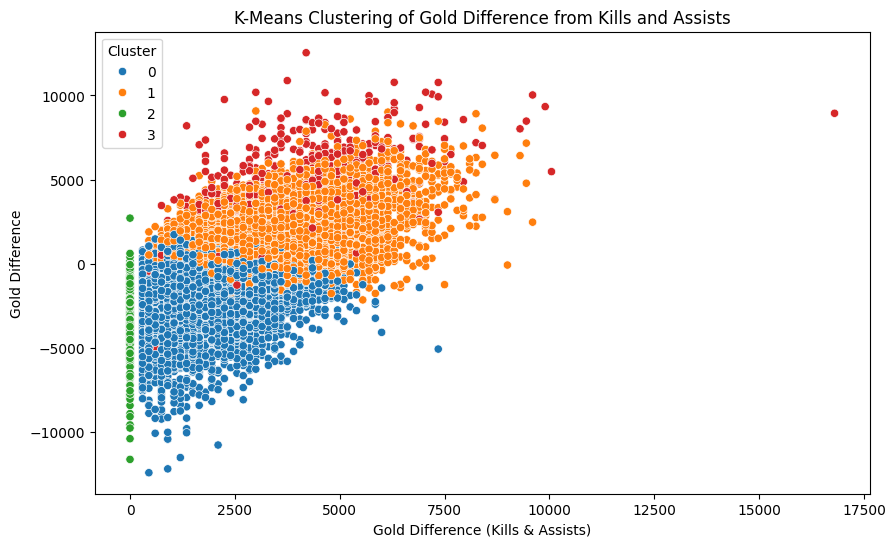

In [168]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def kmeans_for_gold_difference(df: pd.DataFrame, time_limit: int = 10, n_clusters: int = 3) -> pd.DataFrame:
    # Filter the data for the first 10 minutes
    early_game_df = df[df['frame'] <= time_limit].copy()

    # Calculate gold difference from kills and assists
    early_game_df['goldDiff_kills_assists'] = early_game_df['kills'] * 300 + early_game_df['assists'] * 150

    # Select relevant features
    features = ['goldDiff_kills_assists', 'goldDiff', 'expDiff', 'champLevelDiff', 'isFirstBlood', 'isFirstTower']
    data = early_game_df[features]

    # Normalize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)

    # Add cluster labels to the original DataFrame
    early_game_df['Cluster'] = clusters

    return early_game_df, kmeans

# Apply the function to cluster the data
clustered_df, kmeans_model = kmeans_for_gold_difference(df, time_limit=10, n_clusters=4)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustered_df, x='goldDiff_kills_assists', y='goldDiff', hue='Cluster', palette='tab10')
plt.title('K-Means Clustering of Gold Difference from Kills and Assists')
plt.xlabel('Gold Difference (Kills & Assists)')
plt.ylabel('Gold Difference')
plt.legend(title='Cluster')
plt.show()


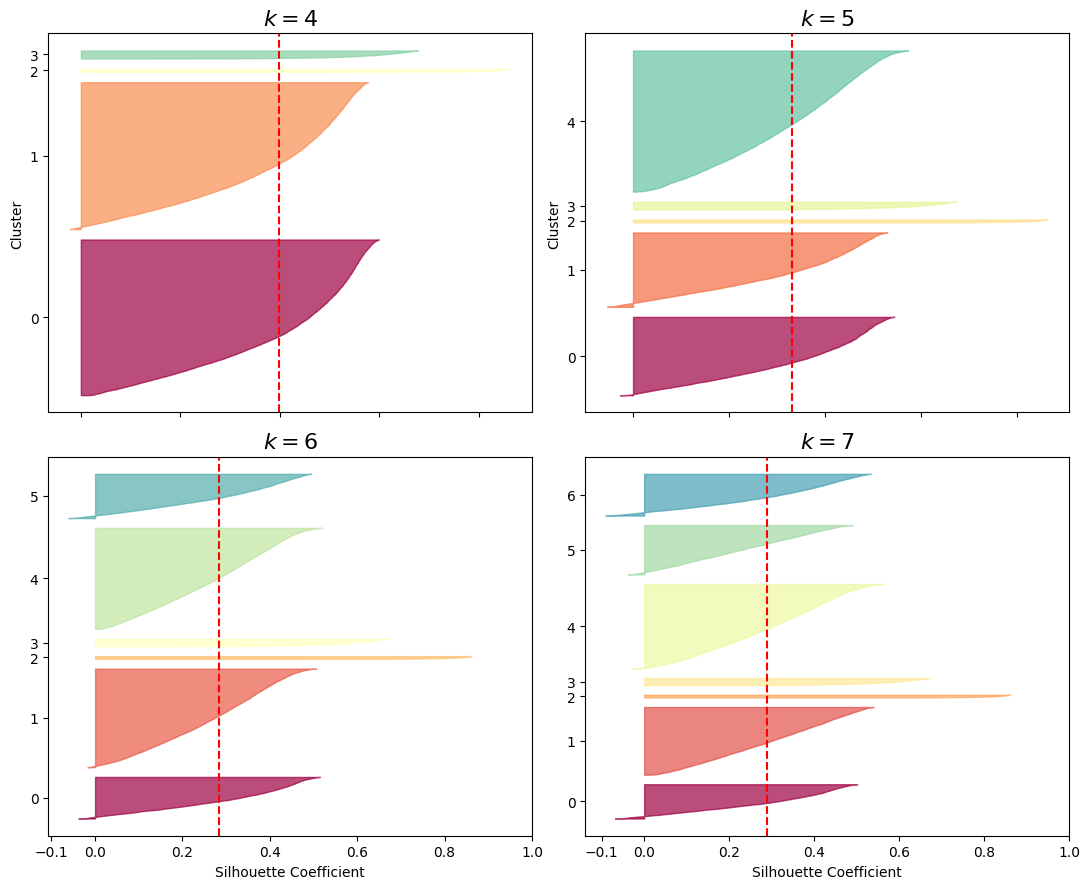

In [166]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

def plot_silhouette_analysis(X_scaled, k_values):
    """
    Creates silhouette plots for different cluster numbers.

    Parameters:
        X_scaled (numpy.ndarray): Scaled feature matrix.
        k_values (list): List of k values to evaluate.
    """
    plt.figure(figsize=(11, 9))
    
    silhouette_scores = []
    kmeans_per_k = {}
    
    for k in k_values:
        # Apply KMeans for each value of k
        kmeans = KMeans(n_clusters=k, random_state=42)
        y_pred = kmeans.fit_predict(X_scaled)
        kmeans_per_k[k] = kmeans
        
        # Compute silhouette coefficients
        silhouette_coefficients = silhouette_samples(X_scaled, y_pred)
        silhouette_scores.append(silhouette_score(X_scaled, y_pred))

        # Create a subplot for the current k
        plt.subplot(2, 2, k_values.index(k) + 1)
        
        padding = len(X_scaled) // 30
        pos = padding
        ticks = []
        
        for i in range(k):
            # Select and sort silhouette coefficients for cluster i
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()
            
            color = mpl.cm.Spectral(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        # Set y-axis labels for clusters
        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        
        # Add labels and title
        if k in k_values[:2]:
            plt.tick_params(labelbottom=False)
        else:
            plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
        plt.ylabel("Cluster" if k in k_values[:2] else "")
        plt.axvline(x=silhouette_scores[-1], color="red", linestyle="--")
        plt.title(f"$k={k}$", fontsize=16)
    
    plt.tight_layout()
    plt.show()

# Example usage:
k_values = [4 ,5, 6, 7]

# Filter data for the first 10 minutes
early_game_df = df[df['frame'] <= 10].copy()

# Calculate gold difference from kills and assists (now with .loc)
early_game_df.loc[:, 'goldDiff_kills_assists'] = early_game_df['kills'] * 300 + early_game_df['assists'] * 150

# Select relevant features
features = ['goldDiff_kills_assists', 'goldDiff', 'expDiff', 'champLevelDiff', 'isFirstBlood', 'isFirstTower']
data = early_game_df[features]

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Plot silhouette analysis
plot_silhouette_analysis(data_scaled, k_values)



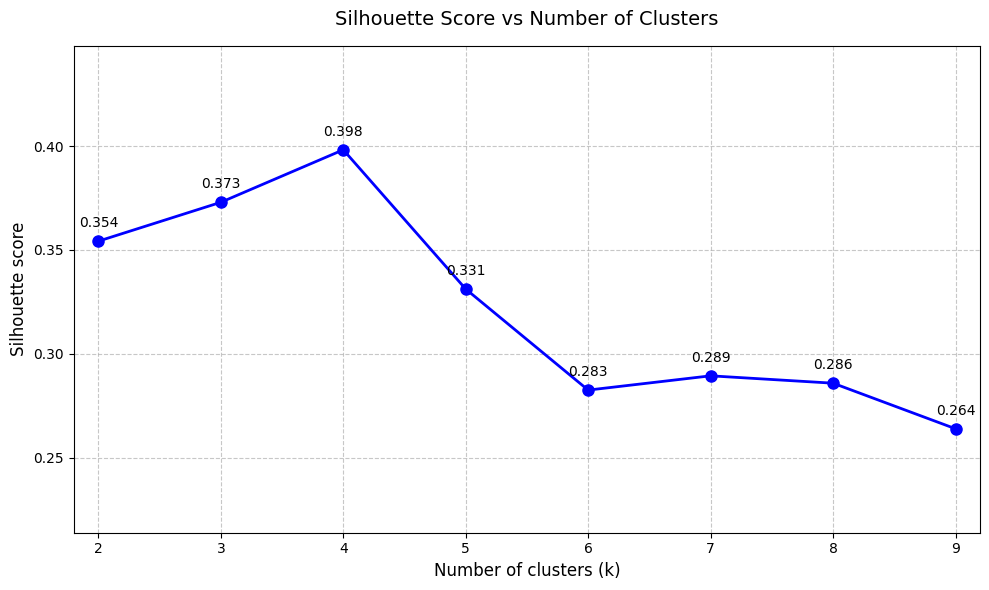

In [167]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_scaled)
                for k in range(1, 10)]

# Calculate silhouette scores (starting from k=2 as silhouette score isn't defined for k=1)
silhouette_scores = [silhouette_score(data_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-", linewidth=2, markersize=8)
plt.xlabel("Number of clusters (k)", fontsize=12)
plt.ylabel("Silhouette score", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Silhouette Score vs Number of Clusters", fontsize=14, pad=15)

# Adjust the axis to show the relevant range of scores
y_min = min(silhouette_scores) - 0.05
y_max = max(silhouette_scores) + 0.05
plt.axis([1.8, 9.2, y_min, y_max])

# Add score values above each point
for k, score in enumerate(silhouette_scores, 2):
    plt.annotate(f'{score:.3f}', 
                xy=(k, score), 
                xytext=(0, 10),
                textcoords='offset points', 
                ha='center')

plt.tight_layout()
plt.show()

## **Fase 5: Evaluation**

### **Does the Gold Difference obtained from kills and assists in the first 10 minutes of the game have a significant impact on a team's probability of victory?**

### **RandomForestClassifier**

##### **Confusion Matrix:**

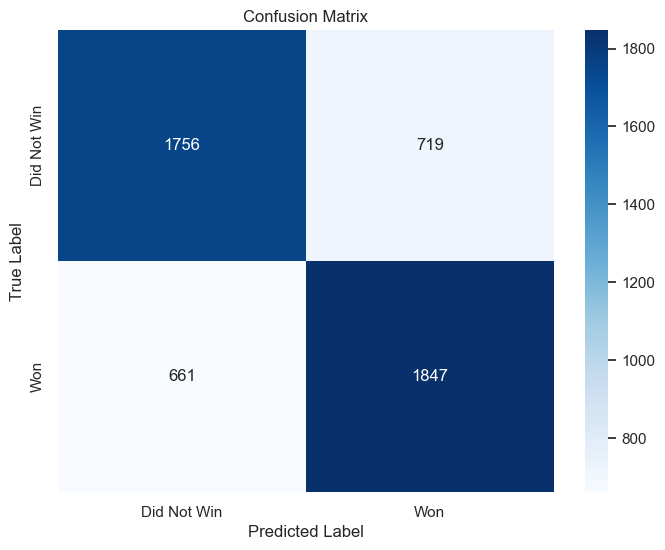

In [263]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test_gold, y_pred_gold)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Did Not Win', 'Won'], 
            yticklabels=['Did Not Win', 'Won'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

##### **Classification_report:**

In [265]:
report = classification_report(y_test_gold, y_pred_gold)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      2475
           1       0.72      0.74      0.73      2508

    accuracy                           0.72      4983
   macro avg       0.72      0.72      0.72      4983
weighted avg       0.72      0.72      0.72      4983



### **Linear Regression**

#####  **Confusion Matrix:**

In [270]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular las métricas
r2 = r2_score(y_test_reg, y_pred)
mae = mean_absolute_error(y_test_reg, y_pred)
mse = mean_squared_error(y_test_reg, y_pred)
rmse = np.sqrt(mse)  # Calcular RMSE manualmente

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R² Score: 0.18
Mean Absolute Error: 0.41
Mean Squared Error: 0.20
Root Mean Squared Error: 0.45


### **How do neutral objectives (Dragons, Baron, and Rift Herald) impact a team’s victory?**

### **XGBOOSTCLASSIFIER:**

#####  **Confusion Matrix:**

In [264]:

conf_matrix = confusion_matrix(y_test, y_pred_noisy)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Win', 'Won'], yticklabels=['Did Not Win', 'Won'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y_pred_noisy' is not defined

##### **Classification_report:**

In [298]:
report = classification_report(y_test, y_pred_noisy)
print("Classification_report:\n", report)

Classification_report:
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      2386
         1.0       0.91      0.89      0.90      2597

    accuracy                           0.89      4983
   macro avg       0.89      0.90      0.89      4983
weighted avg       0.90      0.89      0.89      4983



The obtained F1 score was quite good, indicating positive results, and the data appears to be well-balanced.

##### **Curva ROC:**

In [299]:
# Define the number of synthetic data rows you want to generate
num_rows = 5

# Generate synthetic data
synthetic_data = {
    'gameId': np.random.randint(1, 1000, size=num_rows), 
    'frame': np.random.randint(0, 1000, size=num_rows), 
    'killedFireDrake': np.random.randint(0, 2, size=num_rows),  
    'killedWaterDrake': np.random.randint(0, 2, size=num_rows), 
    'killedAirDrake': np.random.randint(0, 2, size=num_rows),   
    'killedEarthDrake': np.random.randint(0, 2, size=num_rows),
    'killedElderDrake': np.random.randint(0, 2, size=num_rows), 
    'lostFireDrake': np.random.randint(0, 2, size=num_rows),    
    'lostWaterDrake': np.random.randint(0, 2, size=num_rows),   
    'lostAirDrake': np.random.randint(0, 2, size=num_rows),    
    'lostEarthDrake': np.random.randint(0, 2, size=num_rows), 
    'lostElderDrake': np.random.randint(0, 2, size=num_rows),   
    'killedBaronNashor': np.random.randint(0, 2, size=num_rows), 
    'lostBaronNashor': np.random.randint(0, 2, size=num_rows),   
    'killedRiftHerald': np.random.randint(0, 2, size=num_rows),  
    'lostRiftHerald': np.random.randint(0, 2, size=num_rows),   
    'totalDragonsKilled': np.random.randint(0, 10, size=num_rows), 
    'totalDragonsLost': np.random.randint(0, 10, size=num_rows),   
    'totalObjectivesKilled': np.random.randint(0, 15, size=num_rows), 
    'totalObjectivesLost': np.random.randint(0, 15, size=num_rows),   
}

# Create DataFrame
df_new_data = pd.DataFrame(synthetic_data)


In [300]:
# Make predictions
predictions = best_model.predict(df_new_data)

# Convert predictions to labels 'Win' or 'Lose'
results = ['Win' if pred == 1 else 'Lose' for pred in predictions]

# Show results
print("Prediction results:", results)

Prediction results: ['Lose', 'Lose', 'Win', 'Win', 'Win']


### **XGBOOSTREGRESSOR:**

##### **Metrics**

In [60]:
# Assuming y_test are the true values and y_pred are the predictions made by your model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


R² Score: 0.69
Mean Absolute Error: 0.16
Mean Squared Error: 0.08
Root Mean Squared Error: 0.28


/home/pepa/anaconda3/envs/mi_entorno_cuml/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The evaluation of the regression model yielded an R² score of 0.69, indicating that approximately 69% of the variability in the target variable can be explained by the model. The Mean Absolute Error (MAE) was calculated at 0.16, suggesting that the predictions are generally close to the actual values. Additionally, the Mean Squared Error (MSE) was found to be 0.08, while the Root Mean Squared Error (RMSE) stood at 0.28. These metrics collectively indicate a solid performance of the regression model in predicting outcomes.

##### **Prediction**

In [66]:
# Define the number of synthetic data rows you want to generate
num_rows = 5

# Generate synthetic data
synthetic_data = {
    'gameId': np.random.randint(1, 1000, size=num_rows), 
    'frame': np.random.randint(0, 1000, size=num_rows), 
    'killedFireDrake': np.random.randint(0, 2, size=num_rows),  
    'killedWaterDrake': np.random.randint(0, 2, size=num_rows), 
    'killedAirDrake': np.random.randint(0, 2, size=num_rows),   
    'killedEarthDrake': np.random.randint(0, 2, size=num_rows),
    'killedElderDrake': np.random.randint(0, 2, size=num_rows), 
    'lostFireDrake': np.random.randint(0, 2, size=num_rows),    
    'lostWaterDrake': np.random.randint(0, 2, size=num_rows),   
    'lostAirDrake': np.random.randint(0, 2, size=num_rows),    
    'lostEarthDrake': np.random.randint(0, 2, size=num_rows), 
    'lostElderDrake': np.random.randint(0, 2, size=num_rows),   
    'killedBaronNashor': np.random.randint(0, 2, size=num_rows), 
    'lostBaronNashor': np.random.randint(0, 2, size=num_rows),   
    'killedRiftHerald': np.random.randint(0, 2, size=num_rows),  
    'lostRiftHerald': np.random.randint(0, 2, size=num_rows),   
    'totalDragonsKilled': np.random.randint(0, 10, size=num_rows), 
    'totalDragonsLost': np.random.randint(0, 10, size=num_rows),   
    'totalObjectivesKilled': np.random.randint(0, 15, size=num_rows), 
    'totalObjectivesLost': np.random.randint(0, 15, size=num_rows),   
}

# Create DataFrame
df_new_data = pd.DataFrame(synthetic_data)


In [68]:
# Make predictions
predictions = best_model.predict(df_new_data)

# Convert predictions to labels 'Win' or 'Lose'
results = ['Win' if pred == 1 else 'Lose' for pred in predictions]

# Show results
print("Prediction results:", results)

Prediction results: ['Lose', 'Lose', 'Lose', 'Lose', 'Lose']


### **Time series prediction**

### **GradientBoostingRegressor:**

##### **Metrics**

In [54]:
# Assuming y_test are the true values and y_pred are the predictions made by your model
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


R² Score: 0.12
Mean Absolute Error: 20520.49
Mean Squared Error: 8397108862.56
Root Mean Squared Error: 26229.40


/home/pepa/anaconda3/envs/mi_entorno_cuml/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The Gradient Boosting regression model exhibited the following performance metrics: an R² score of 0.12, indicating that it explains only 12% of the variability in the target variable. The Mean Absolute Error (MAE) was 20,520.49, suggesting that, on average, the model's predictions deviate from the actual values by this amount. Additionally, the Mean Squared Error (MSE) was 8,397,108,862.56, and the Root Mean Squared Error (RMSE) was 26,229.40, reflecting significant discrepancies in the predictions. These metrics highlight the need for further refinement of the model to enhance its predictive accuracy.